# Income Transition Matrix

In this Jupyter Notebook, we use PSID data to calculate income transition matrices conditional on age and on the key variables from Chetty, et al (2014): high school dropout rate, crime rate (social capital), and inequality (gini coefficient).

The income transition matrix is:
$$\begin{bmatrix} p_{11} & p_{12} & p_{13} &p_{14} \\ p_{21} & p_{22} & p_{23} &p_{24} \\ p_{31} & p_{32} & p_{33} &p_{34} \\p_{41} & p_{42} & p_{43} &p_{44} \end{bmatrix}$$

$p_{11}$ refers to the probability of an individual whose income is below the lower quartile at period 1 will also have income below the lower quartile at period 2.

$p_{12}$ refers to the probability of an individual whose income is below the lower quartile at period 1 will have income above the lower quartile but below the median at period 2.

$p_{13}$ refers to the probability of an individual whose income is below the lower quartile at period 1 will have income above the median but below the upper quartile at period 2.

$p_{14}$ refers to the probability of an individual whose income is below the lower quartile at period 1 will have income above the upper quartile at period 2.

Other probabilities have similar interpretations.

## 1. Conditional on age only

In this part, we estimate income transition matrices only conditional on age.

First, we should load the data and calculate the lower quartiles, medians, and upper quartiles of people's income in each year.

In [2]:
from bokeh.plotting import figure, output_file, show

In [3]:
import numpy as np
import pandas as pd
import xlrd
#import chardet
data = xlrd.open_workbook('/Users/fulinguo/Desktop/income4/income4.xlsx')

In [4]:
table = data.sheets()[0]
nrows = table.nrows
columns=table.row_values(0)
income=[]
for i in range(1,nrows):
    income.append(table.row_values(i))
income=np.array(income)
income=pd.DataFrame(income,columns=columns)

In [5]:
income.head()
len(income)

71891

In [24]:
age_ind=columns[4::5]
inc_ind=columns[5::5]
age_ind

['ER30004',
 'ER30023',
 'ER30046',
 'ER30070',
 'ER30094',
 'ER30120',
 'ER30141',
 'ER30163',
 'ER30191',
 'ER30220',
 'ER30249',
 'ER30286',
 'ER30316',
 'ER30346',
 'ER30376',
 'ER30402',
 'ER30432',
 'ER30466',
 'ER30501',
 'ER30538',
 'ER30573',
 'ER30609',
 'ER30645',
 'ER33804',
 'ER33904',
 'ER34004',
 'ER34104',
 'ER34204',
 'ER34305',
 'ER34504']

Calculate the lower quartiles, medians, and upper quartiles of people's income in each year.

In [25]:
inc_quan=[]
for ind in inc_ind:
    upp=income[(income[ind]!=0)][ind].quantile(0.75)
    med=income[(income[ind]!=0)][ind].quantile(0.5)
    low=income[(income[ind]!=0)][ind].quantile(0.25)
    inc_quan.append([upp,med,low])
inc_quan=np.array(inc_quan)
inc_quan

array([[ 6450.  ,  3380.  ,  1009.5 ],
       [ 7244.75,  3650.  ,  1176.  ],
       [ 7000.  ,  3700.  ,  1200.  ],
       [ 7563.5 ,  4000.  ,  1320.  ],
       [ 7888.  ,  4000.  ,  1215.  ],
       [ 8816.25,  4604.  ,  1500.  ],
       [ 9300.  ,  5000.  ,  1800.  ],
       [ 9200.  ,  4937.5 ,  1500.  ],
       [ 9900.  ,  5000.  ,  1625.  ],
       [11000.  ,  5600.  ,  1770.75],
       [12000.  ,  6500.  ,  2300.  ],
       [13200.  ,  7000.  ,  2394.  ],
       [14709.  ,  8000.  ,  3000.  ],
       [15901.25,  8450.  ,  3000.  ],
       [17500.  ,  9000.  ,  3200.  ],
       [18000.  ,  9500.  ,  3200.  ],
       [19200.  , 10000.  ,  3555.  ],
       [20500.  , 11000.  ,  4000.  ],
       [22000.  , 12000.  ,  4016.5 ],
       [23000.  , 12005.  ,  4500.  ],
       [24000.  , 13000.  ,  5000.  ],
       [25004.5 , 14000.  ,  5000.  ],
       [25000.  , 13200.  ,  5000.  ],
       [10242.  ,  5000.  ,  3000.  ],
       [12000.  ,  5500.  ,  3000.  ],
       [15000.  ,  7189. 

### 1.1 Set the interval be two years

In this part, we set the interval be two years ( so $p_{11}$ refers to the probability of an individual whose income is below the lower quartile at period 1 will also have income below the lower quartile two years later). 

We set the interval be two years in this part because the PSID data are released every two years after 2005.

In [26]:
med_mar1=[[0]*16]*59
med_mar1=np.array(med_mar1)
for i in range(len(income)):
    for j in range(len(age_ind)-2):
        type=16
        if j<=20:
            age=income.values[i][4+5*j]
            inc=income.values[i][5+5*j]
            age2=income.values[i][4+5*(j+2)]
            inc2=income.values[i][5+5*(j+2)]
        elif j>=23:
            age=income.values[i][4+5*j]
            inc=income.values[i][5+5*j]
            age2=income.values[i][4+5*(j+1)]
            inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=78) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<inc_quan[j][2]) & (inc2<inc_quan[j+2][2]):
                type=0
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+2][2]) & (inc2<inc_quan[j+2][1]):
                type=1
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+2][1]) & (inc2<inc_quan[j+2][0]):
                type=2
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+2][0]):
                type=3
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2<inc_quan[j+2][2]):
                type=4
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+2][2]) & (inc2<inc_quan[j+2][1]):
                type=5
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+2][1]) & (inc2<inc_quan[j+2][0]):
                type=6
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+2][0]):
                type=7
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2<inc_quan[j+2][2]):
                type=8
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+2][2]) & (inc2<inc_quan[j+2][1]):
                type=9
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+2][1]) & (inc2<inc_quan[j+2][0]):
                type=10
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+2][0]):
                type=11
            elif (inc>=inc_quan[j][0]) & (inc2<inc_quan[j+2][2]):
                type=12
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+2][2]) & (inc2<inc_quan[j+2][1]):
                type=13
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+2][1]) & (inc2<inc_quan[j+2][0]):
                type=14
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+2][0]):
                type=15
            med_mar1[int(age)-20][type]+=1

In [27]:
med_mar1=med_mar1.reshape(59,4,4)
print('Number matrices:\n',med_mar1)
markov1=[]
for i in range(len(med_mar1)):
    for j in range(4):
        sum_quan=sum(med_mar1[i][j])
        med_mar1[i][j]/max(sum_quan,0.1)
        markov1.append(med_mar1[i][j]/max(sum_quan,0.1))
markov1=np.array(markov1)
markov1=markov1.reshape(59,4,4)

Number matrices:
 [[[ 520  597  305   79]
  [ 305  846  631  156]
  [  68  268  571  227]
  [  16   46   67  122]]

 [[ 471  517  254   75]
  [ 249  898  710  218]
  [  87  328  796  358]
  [  16   56  101  243]]

 [[ 380  413  250   95]
  [ 294  875  697  245]
  [  88  389  935  489]
  [  20   59  137  343]]

 [[ 344  361  200   93]
  [ 256  836  752  277]
  [ 103  393 1161  586]
  [  27   59  189  569]]

 [[ 326  308  162   47]
  [ 226  779  640  272]
  [ 100  437 1242  673]
  [  17   68  247  834]]

 [[ 302  281  122   45]
  [ 219  712  555  228]
  [  99  403 1288  737]
  [  25   53  224 1060]]

 [[ 310  240  128   54]
  [ 197  645  524  214]
  [ 110  344 1226  706]
  [  20   82  246 1195]]

 [[ 284  221  116   45]
  [ 191  639  455  213]
  [  79  346 1121  676]
  [  36   66  257 1462]]

 [[ 275  220   91   61]
  [ 184  566  396  170]
  [  83  320 1066  623]
  [  42   78  257 1461]]

 [[ 271  209   94   39]
  [ 159  543  371  142]
  [  78  266 1014  559]
  [  35   70  259 1578]]

 [

In [28]:
print(markov1)

[[[0.34643571 0.39773484 0.20319787 0.05263158]
  [0.15737874 0.43653251 0.3255934  0.08049536]
  [0.05996473 0.23633157 0.50352734 0.20017637]
  [0.06374502 0.18326693 0.26693227 0.48605578]]

 [[0.35763098 0.39255885 0.19286257 0.05694761]
  [0.12       0.43277108 0.34216867 0.10506024]
  [0.05544933 0.20905035 0.50732951 0.22817081]
  [0.03846154 0.13461538 0.24278846 0.58413462]]

 [[0.33391916 0.3629174  0.21968366 0.08347979]
  [0.13927049 0.4144955  0.33017527 0.11605874]
  [0.04629143 0.20462914 0.4918464  0.25723304]
  [0.03577818 0.10554562 0.2450805  0.61359571]]

 [[0.34468938 0.36172345 0.2004008  0.09318637]
  [0.12069778 0.3941537  0.35454974 0.13059877]
  [0.04592064 0.17521177 0.51761034 0.26125724]
  [0.03199052 0.06990521 0.22393365 0.67417062]]

 [[0.38671412 0.3653618  0.19217082 0.05575326]
  [0.11789254 0.40636411 0.33385498 0.14188837]
  [0.04078303 0.17822186 0.50652529 0.27446982]
  [0.01457976 0.05831904 0.21183533 0.71526587]]

 [[0.40266667 0.37466667 0.162

In [29]:
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
#%matplotlib notebook

In [30]:
q11=[]
q22=[]
q33=[]
q44=[]
for i in markov1:
    q11.append(i[0][0])
    q22.append(i[1][1])
    q33.append(i[2][2])
    q44.append(i[3][3])
age=np.arange(20,20+len(q11))
markov1.shape

(59, 4, 4)

<IPython.core.display.Javascript object>


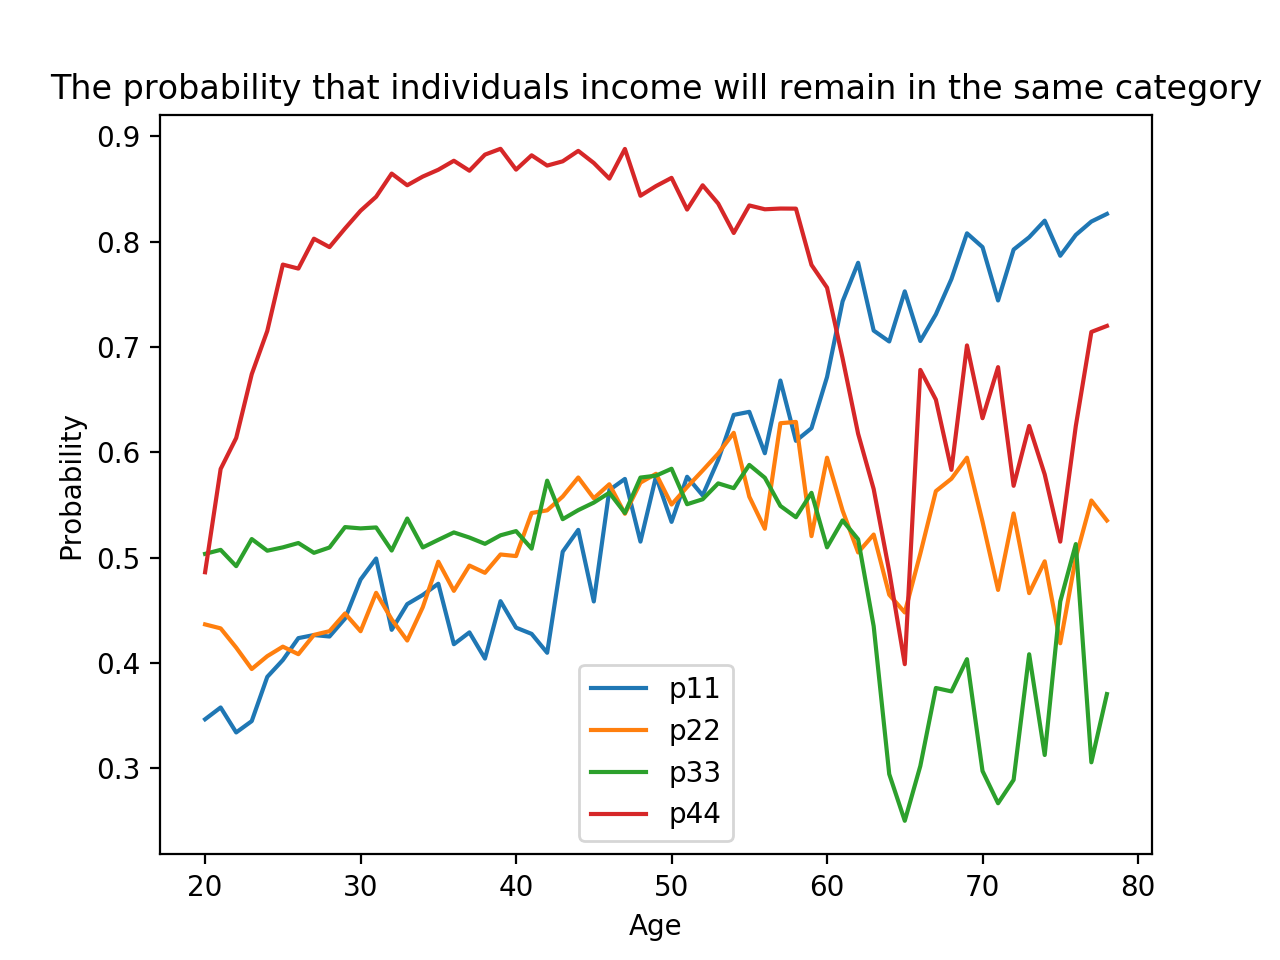

In [31]:
%matplotlib notebook
plt.plot(age,q11,label='p11')
plt.plot(age,q22,label='p22')
plt.plot(age,q33,label='p33')
plt.plot(age,q44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will remain in the same category')
plt.legend()

Findings: when people are younger than 60 years old, $p_{44}$ is the largest (The people in the wealthiest category are most likely to remain in the same category). When age is above 60, $p_{11}$ is the largest (The people in the poorest category are most likely to remain in the same category).

<IPython.core.display.Javascript object>


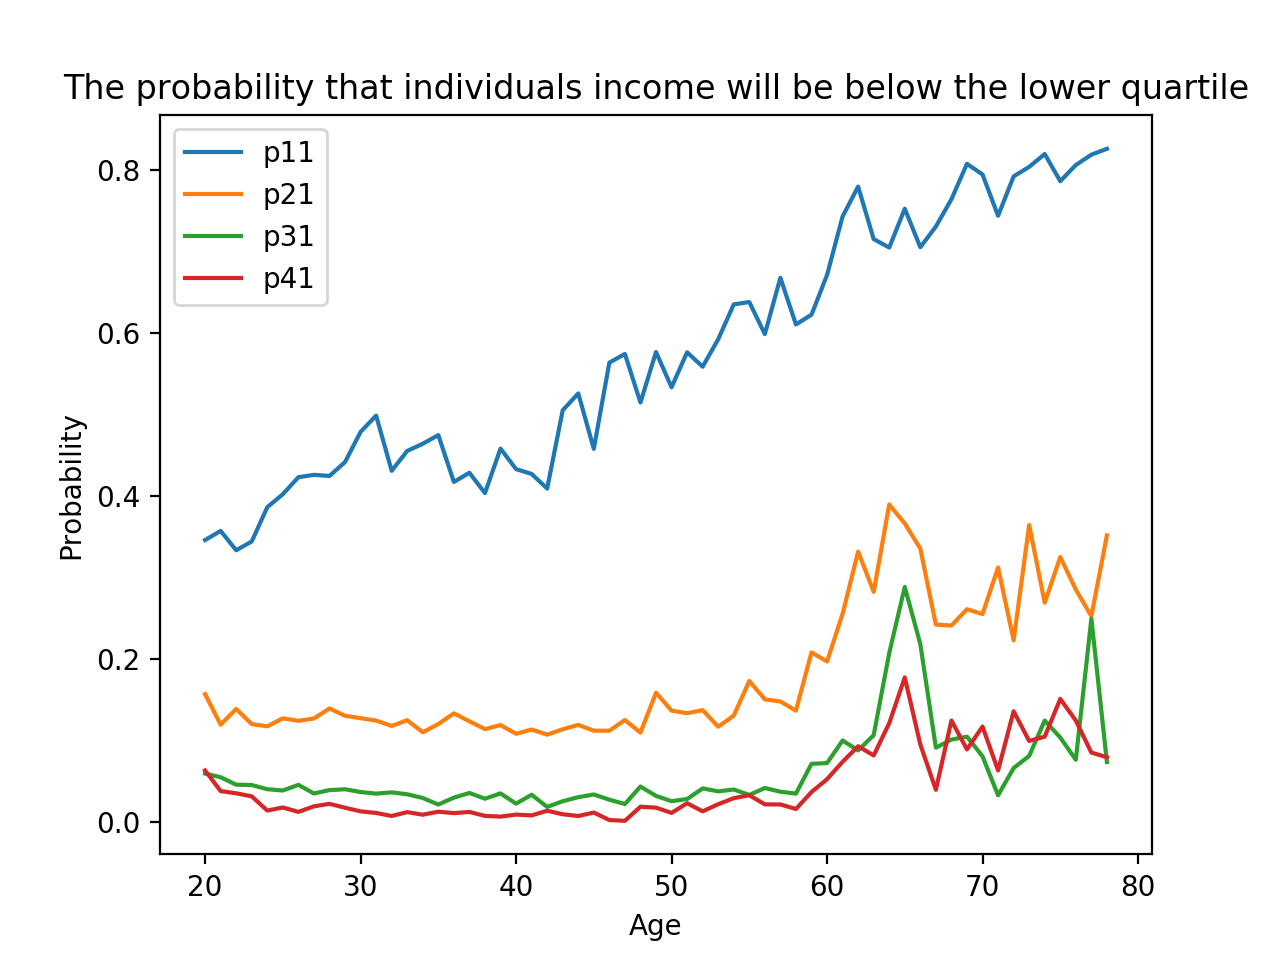

In [32]:
%matplotlib notebook
q11=[]
q21=[]
q31=[]
q41=[]
for i in markov1:
    q11.append(i[0][0])
    q21.append(i[1][0])
    q31.append(i[2][0])
    q41.append(i[3][0])
age=np.arange(20,20+len(q11))
plt.plot(age,q11,label='p11')
plt.plot(age,q21,label='p21')
plt.plot(age,q31,label='p31')
plt.plot(age,q41,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be below the lower quartile')
plt.legend()

Findings: 

1. For people in the poorest category, they are more likely to get out of this category when they are younger.

2. For people not in the poorest category, the probability of falling into the poorest category increase at about 65 years old.

<IPython.core.display.Javascript object>


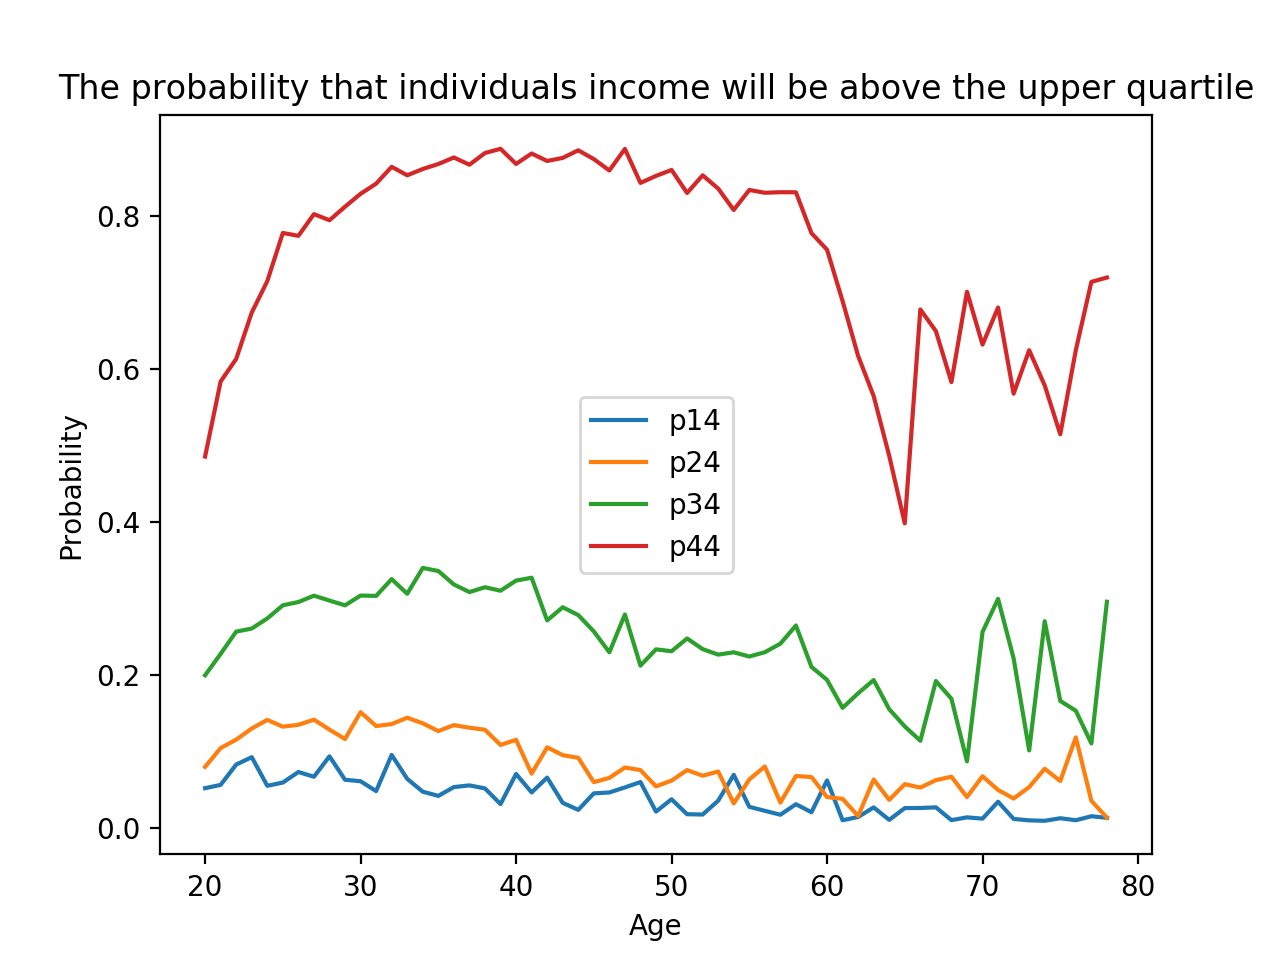

In [33]:
%matplotlib notebook
q14=[]
q24=[]
q34=[]
q44=[]
for i in markov1:
    q14.append(i[0][3])
    q24.append(i[1][3])
    q34.append(i[2][3])
    q44.append(i[3][3])
age=np.arange(20,20+len(q11))
plt.plot(age,q14,label='p14')
plt.plot(age,q24,label='p24')
plt.plot(age,q34,label='p34')
plt.plot(age,q44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be above the upper quartile')
plt.legend()

<IPython.core.display.Javascript object>


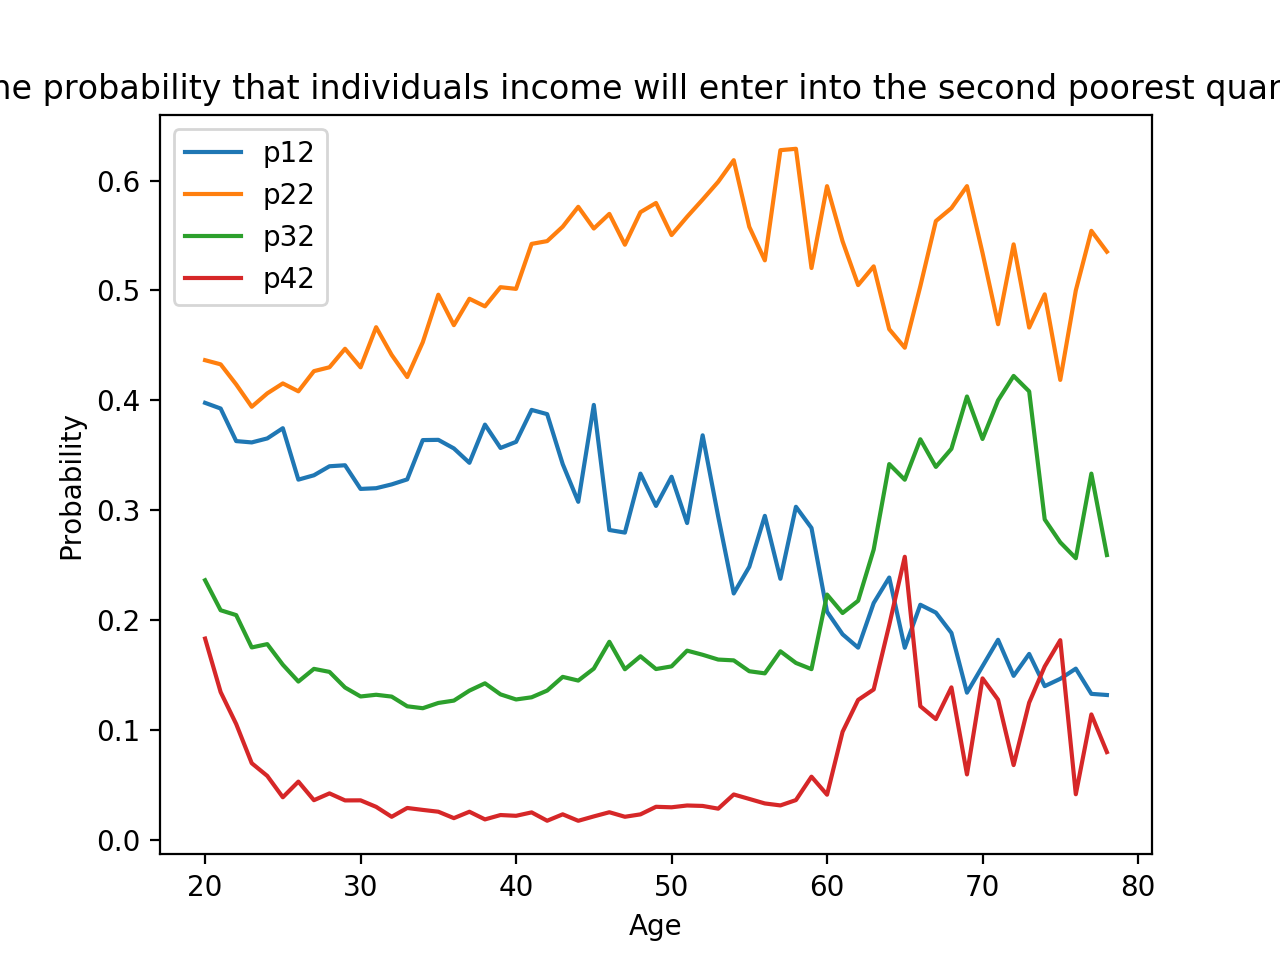

In [36]:
%matplotlib notebook
q12=[]
q22=[]
q32=[]
q42=[]
for i in markov1:
    q12.append(i[0][1])
    q22.append(i[1][1])
    q32.append(i[2][1])
    q42.append(i[3][1])
age=np.arange(20,20+len(q11))
plt.plot(age,q12,label='p12')
plt.plot(age,q22,label='p22')
plt.plot(age,q32,label='p32')
plt.plot(age,q42,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second poorest quantile')
plt.legend()

<IPython.core.display.Javascript object>


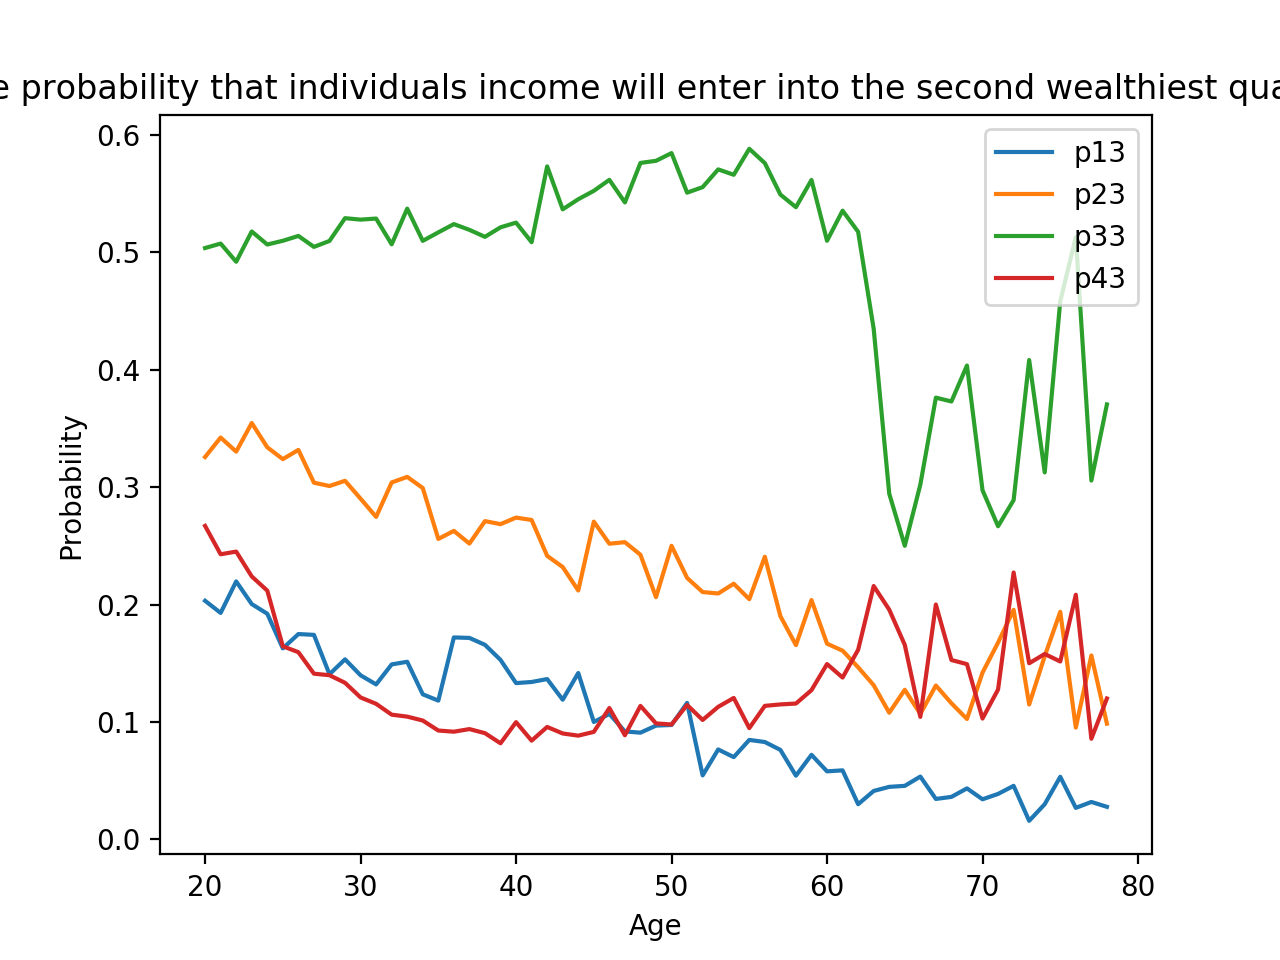

In [34]:
%matplotlib notebook
q13=[]
q23=[]
q33=[]
q43=[]
for i in markov1:
    q13.append(i[0][2])
    q23.append(i[1][2])
    q33.append(i[2][2])
    q43.append(i[3][2])
age=np.arange(20,20+len(q11))
plt.plot(age,q13,label='p13')
plt.plot(age,q23,label='p23')
plt.plot(age,q33,label='p33')
plt.plot(age,q43,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second wealthiest quantile')
plt.legend()

Findings: 

1. For people in the wealthiest category, they are more likely to fall into categories when they are younger than 30 years old or older than 60 years old.

2. For people not in the wealthiest category, the probability of going into the wealthiest category remain roughly unchanged.

### 1.2 Set the interval be 1 year

In this part, we set the interval be 1 year. We only use the data before 1990 in this part since only the data in this period are released annually.

In [38]:
med_mar2=[[0]*16]*59
med_mar2=np.array(med_mar2)
for i in range(len(income)):
    for j in range(len(age_ind)-2):
        type=16
        if j<=21:
            age=income.values[i][4+5*j]
            inc=income.values[i][5+5*j]
            age2=income.values[i][4+5*(j+1)] # set the period interval be 1 year
            inc2=income.values[i][5+5*(j+1)]
        #elif j>=23:
            #age=income.values[i][4+5*j]
            #inc=income.values[i][5+5*j]
            #age2=income.values[i][4+5*(j+1)]
            #inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=78) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=0
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=1
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=2
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=3
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=4
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=5
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=6
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=7
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2<inc_quan[j+1][2]):
                type=8
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=9
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=10
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][0]):
                type=11
            elif (inc>=inc_quan[j][0]) & (inc2<inc_quan[j+1][2]):
                type=12
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=13
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=14
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][0]):
                type=15
            med_mar2[int(age)-20][type]+=1

In [39]:
med_mar2=med_mar2.reshape(59,4,4)
print(med_mar2)
markov2=[]
for i in range(len(med_mar2)):
    for j in range(4):
        sum_quan=sum(med_mar2[i][j])
        med_mar2[i][j]/max(sum_quan,0.1)
        markov2.append(med_mar2[i][j]/max(sum_quan,0.1))
markov2=np.array(markov2)
markov2=markov2.reshape(59,4,4)

[[[ 890  641  204   41]
  [ 388 1107  600   93]
  [  54  291  752  170]
  [  16   40   86  180]]

 [[ 780  597  183   37]
  [ 358 1232  668  108]
  [  78  368 1082  280]
  [  24   51  150  321]]

 [[ 551  455  198   47]
  [ 335 1198  724  155]
  [  97  404 1374  433]
  [  20   79  205  529]]

 [[ 587  485  171   55]
  [ 338 1144  792  161]
  [ 123  453 1621  552]
  [  30   63  275  881]]

 [[ 517  395  127   32]
  [ 311 1040  695  160]
  [ 113  464 1822  600]
  [  17   54  373 1262]]

 [[ 441  328  100   36]
  [ 256 1010  584  139]
  [  92  470 1883  613]
  [  12   80  343 1636]]

 [[ 435  290  107   25]
  [ 244  897  512  129]
  [  99  433 1766  631]
  [  28   74  338 1792]]

 [[ 453  260   92   21]
  [ 237  838  510  106]
  [  96  377 1618  581]
  [  32   88  370 2173]]

 [[ 422  247   90   26]
  [ 257  801  410  119]
  [  83  378 1571  597]
  [  28   67  373 2448]]

 [[ 460  244   79   43]
  [ 200  748  402   91]
  [  85  356 1466  523]
  [  25   90  425 2413]]

 [[ 395  218   77   

In [40]:
print(markov2)

[[[0.50112613 0.36092342 0.11486486 0.02308559]
  [0.1773309  0.5059415  0.27422303 0.04250457]
  [0.04262036 0.2296764  0.59352802 0.13417522]
  [0.04968944 0.1242236  0.26708075 0.55900621]]

 [[0.48841578 0.37382592 0.11458986 0.02316844]
  [0.15131023 0.52071006 0.28233305 0.04564666]
  [0.04314159 0.20353982 0.59845133 0.15486726]
  [0.04395604 0.09340659 0.27472527 0.58791209]]

 [[0.44044764 0.36370903 0.15827338 0.03756994]
  [0.13888889 0.49668325 0.30016584 0.06426202]
  [0.04202773 0.17504333 0.59532062 0.18760832]
  [0.0240096  0.09483794 0.24609844 0.63505402]]

 [[0.45223421 0.37365177 0.13174114 0.04237288]
  [0.13880903 0.4698152  0.32525667 0.0661191 ]
  [0.04474354 0.1647872  0.58966897 0.20080029]
  [0.02401922 0.05044035 0.22017614 0.70536429]]

 [[0.48272642 0.36881419 0.11858077 0.02987862]
  [0.14097915 0.47144152 0.31504986 0.07252947]
  [0.03767923 0.15471824 0.60753585 0.20006669]
  [0.00996483 0.03165299 0.21864009 0.73974209]]

 [[0.48729282 0.36243094 0.110

<IPython.core.display.Javascript object>


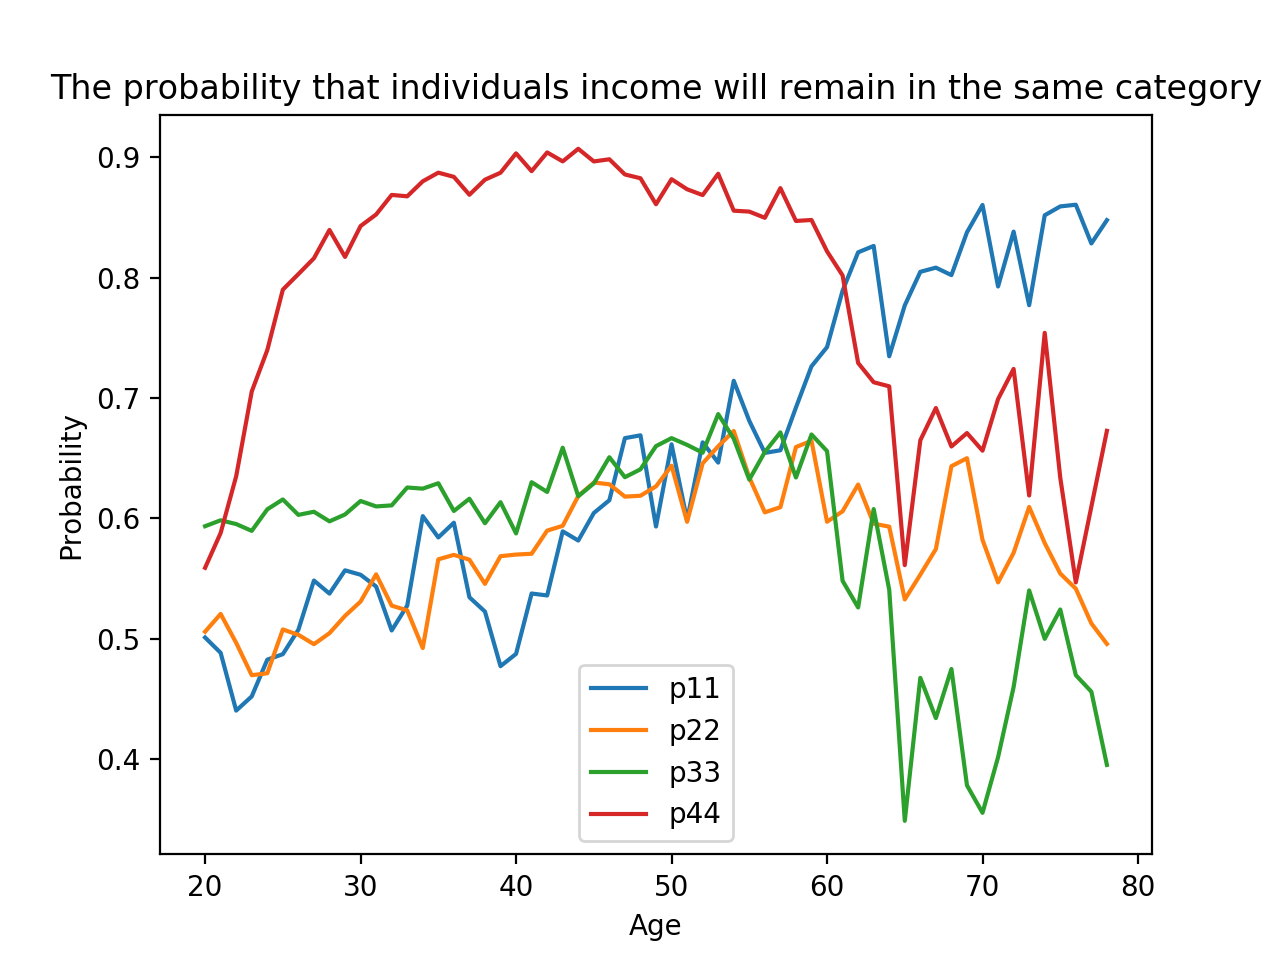

In [45]:
%matplotlib notebook
p11=[]
p22=[]
p33=[]
p44=[]
for i in markov2:
    p11.append(i[0][0])
    p22.append(i[1][1])
    p33.append(i[2][2])
    p44.append(i[3][3])
age=np.arange(20,20+len(p11))
plt.plot(age,p11,label='p11')
plt.plot(age,p22,label='p22')
plt.plot(age,p33,label='p33')
plt.plot(age,p44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will remain in the same category')
plt.legend()

Findings: 

1. when people are younger than 60 years old, $p_{44}$ is the largest (The people in the wealthiest category are most likely to remain in the same category). When age is above 60, $p_{11}$ is the largest (The people in the poorest category are most likely to remain in the same category).

2. Although the probabilities are higher in this part, the trends are similar with that when setting the interval be two years.

<IPython.core.display.Javascript object>


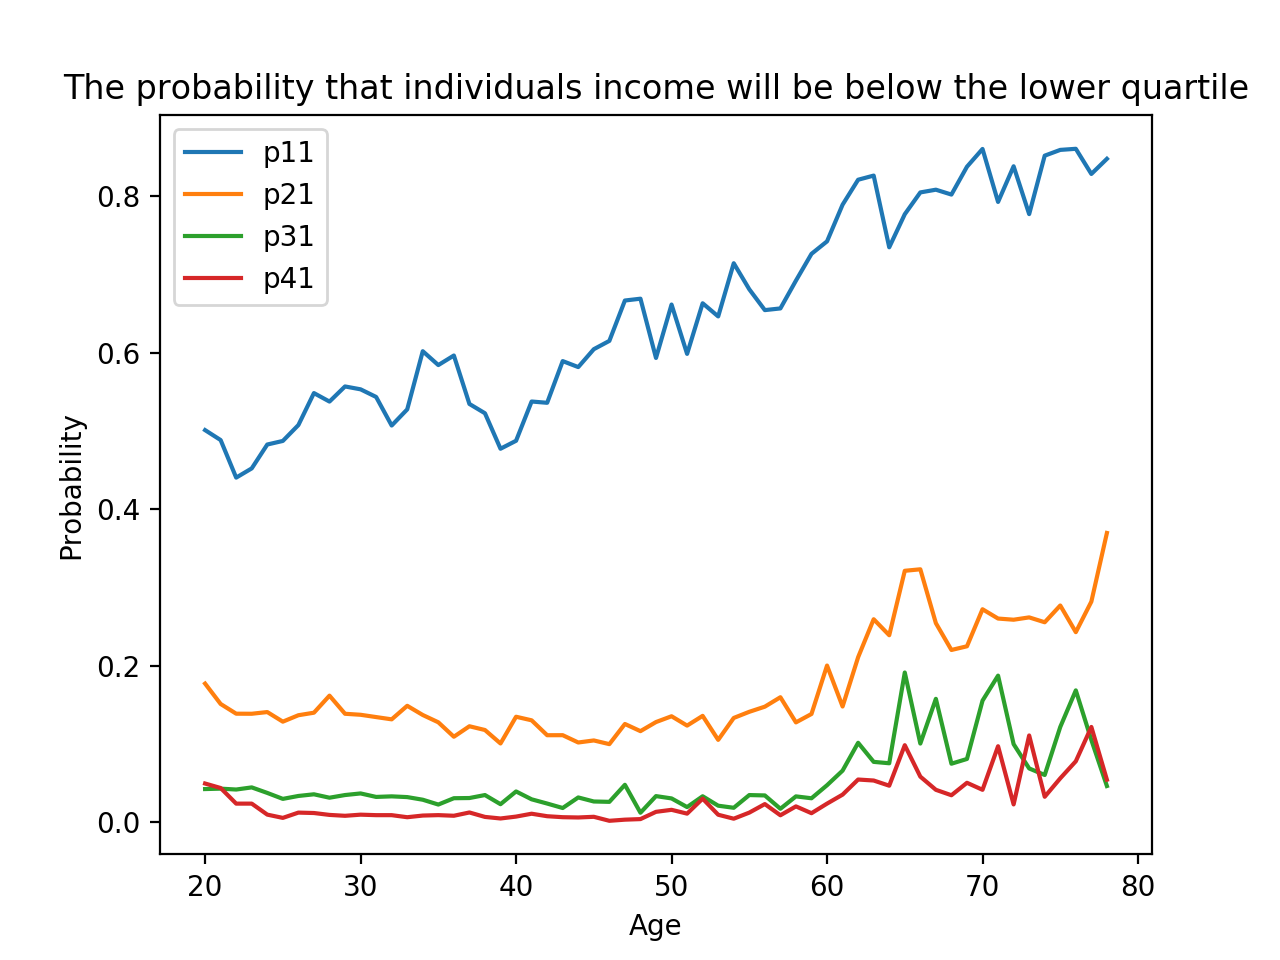

In [46]:
%matplotlib notebook
p11=[]
p21=[]
p31=[]
p41=[]
for i in markov2:
    p11.append(i[0][0])
    p21.append(i[1][0])
    p31.append(i[2][0])
    p41.append(i[3][0])
age=np.arange(20,20+len(q11))
plt.plot(age,p11,label='p11')
plt.plot(age,p21,label='p21')
plt.plot(age,p31,label='p31')
plt.plot(age,p41,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be below the lower quartile')
plt.legend()

Findings: 

1. For people in the poorest category, they are more likely to get out of this category when they are younger.

2. For people not in the poorest category, the probability of falling into the poorest category increase at about 65 years old.

3. The trends are similar to that of last part.

<IPython.core.display.Javascript object>


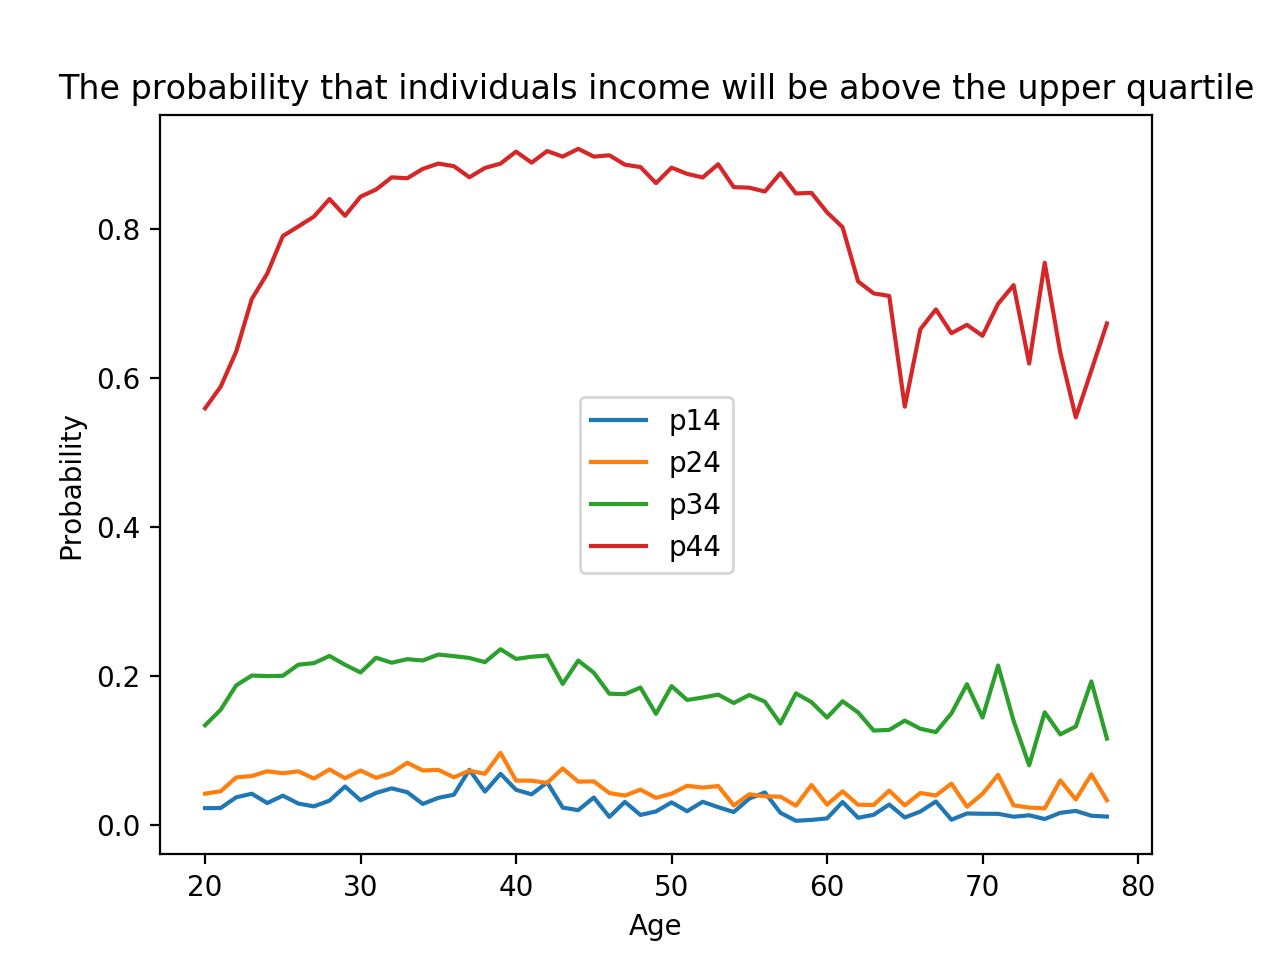

In [43]:
%matplotlib notebook
p14=[]
p24=[]
p34=[]
p44=[]
for i in markov2:
    p14.append(i[0][3])
    p24.append(i[1][3])
    p34.append(i[2][3])
    p44.append(i[3][3])
age=np.arange(20,20+len(q11))
plt.plot(age,p14,label='p14')
plt.plot(age,p24,label='p24')
plt.plot(age,p34,label='p34')
plt.plot(age,p44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be above the upper quartile')
plt.legend()

<IPython.core.display.Javascript object>


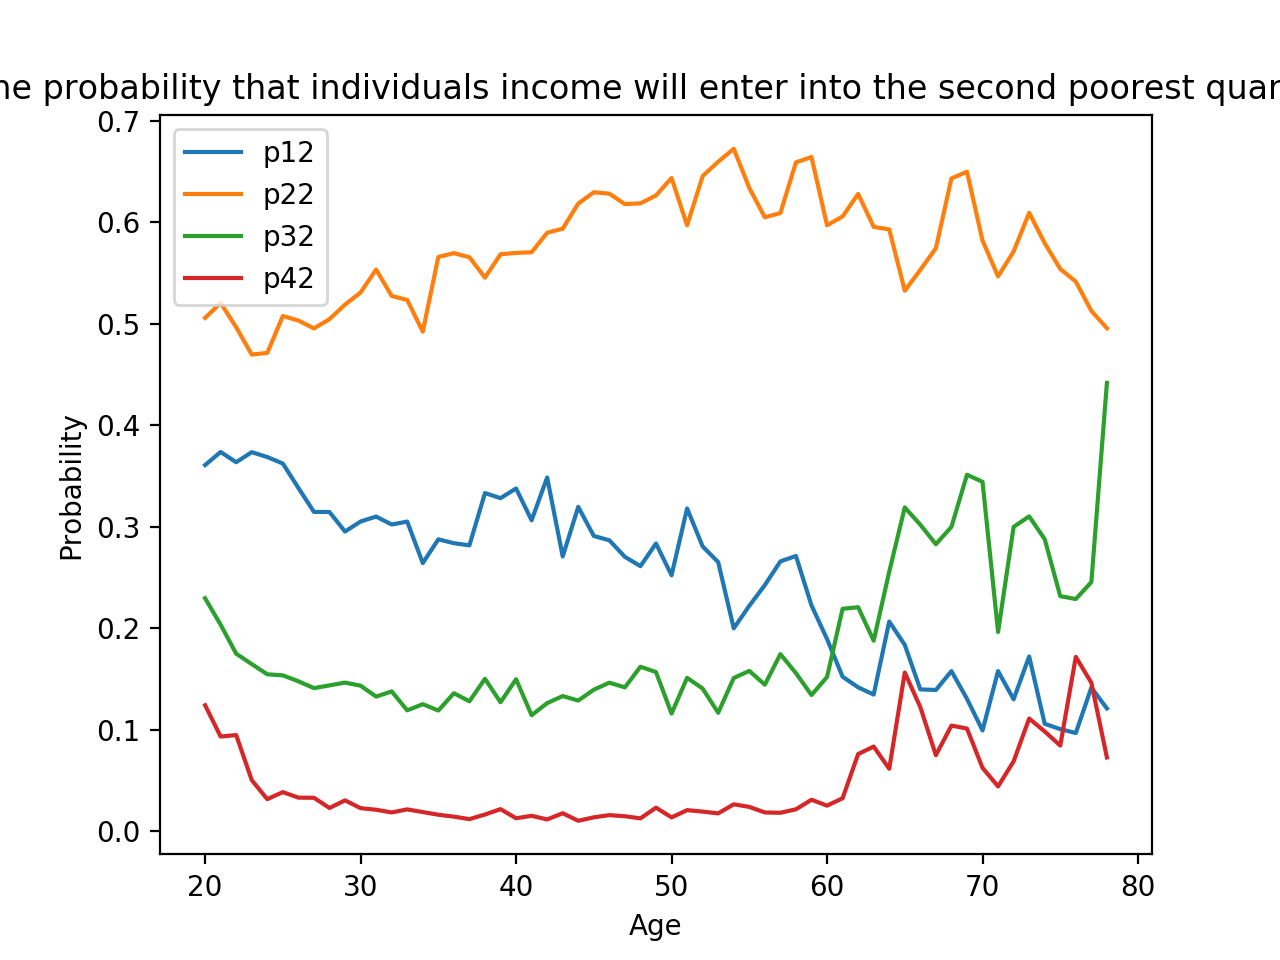

In [47]:
%matplotlib notebook
p12=[]
p22=[]
p32=[]
p42=[]
for i in markov2:
    p12.append(i[0][1])
    p22.append(i[1][1])
    p32.append(i[2][1])
    p42.append(i[3][1])
age=np.arange(20,20+len(q11))
plt.plot(age,p12,label='p12')
plt.plot(age,p22,label='p22')
plt.plot(age,p32,label='p32')
plt.plot(age,p42,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second poorest quantile')
plt.legend()

<IPython.core.display.Javascript object>


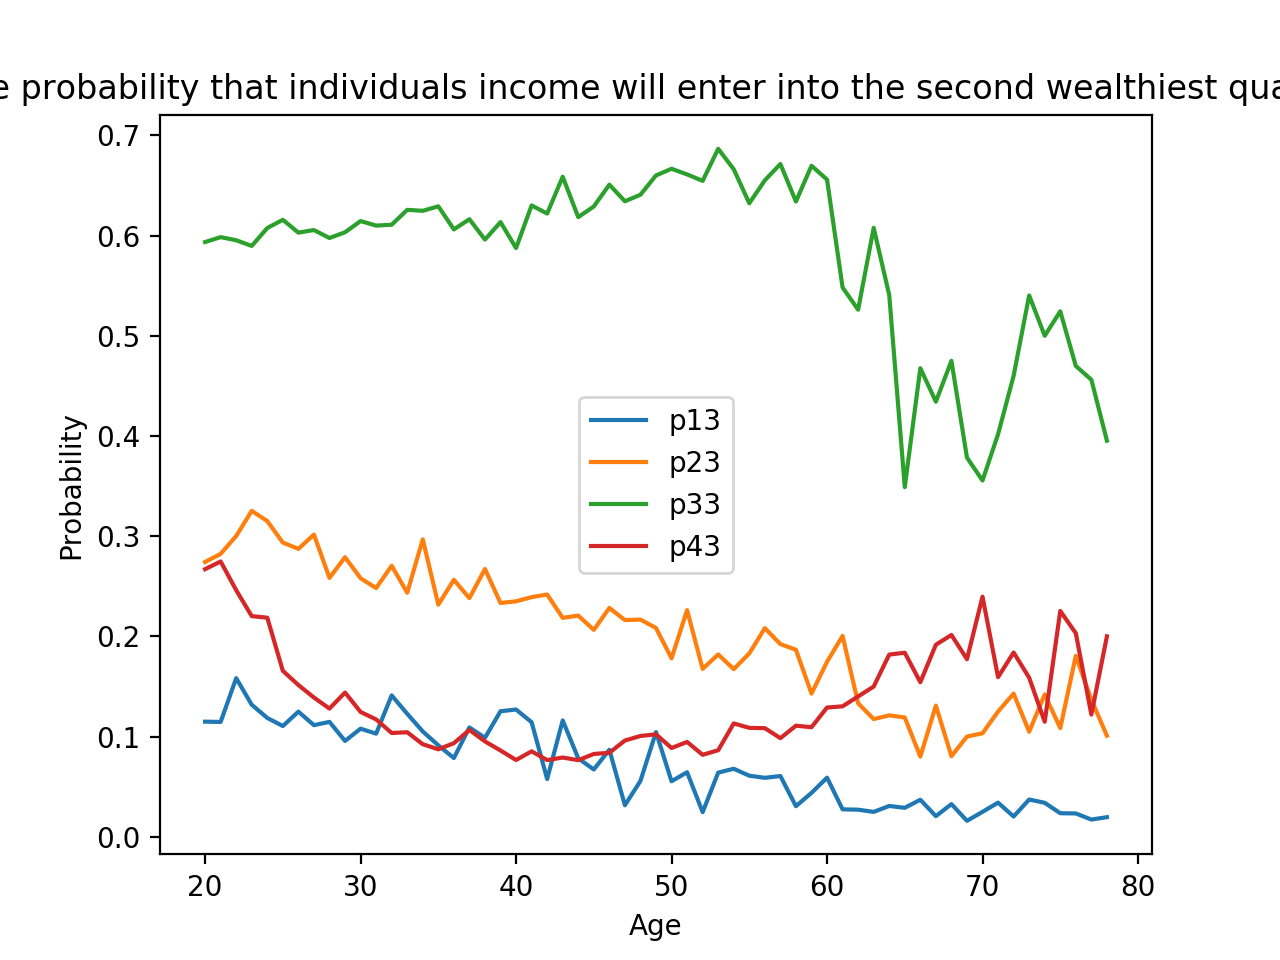

In [48]:
%matplotlib notebook
p13=[]
p23=[]
p33=[]
p43=[]
for i in markov2:
    p13.append(i[0][2])
    p23.append(i[1][2])
    p33.append(i[2][2])
    p43.append(i[3][2])
age=np.arange(20,20+len(q11))
plt.plot(age,p13,label='p13')
plt.plot(age,p23,label='p23')
plt.plot(age,p33,label='p33')
plt.plot(age,p43,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second wealthiest quantile')
plt.legend()

Finding:

The trend is similar to that in last part.

### 1.3 Test for the consistency of the income transition matrix

The income transition matrix using the data from 1968-1979:

In [49]:
med_mar3=[[0]*16]*59
med_mar3=np.array(med_mar3)
for i in range(len(income)):
    for j in range(len(age_ind)-2):
        type=16
        if j<=10:
            age=income.values[i][4+5*j]
            inc=income.values[i][5+5*j]
            age2=income.values[i][4+5*(j+1)]
            inc2=income.values[i][5+5*(j+1)]
        #elif j>=23:
            #age=income.val ues[i][4+5*j]
            #inc=income.values[i][5+5*j]
            #age2=income.values[i][4+5*(j+1)]
            #inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=78) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=0
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=1
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=2
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=3
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=4
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=5
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=6
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=7
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2<inc_quan[j+1][2]):
                type=8
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=9
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=10
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][0]):
                type=11
            elif (inc>=inc_quan[j][0]) & (inc2<inc_quan[j+1][2]):
                type=12
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=13
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=14
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][0]):
                type=15
            med_mar3[int(age)-20][type]+=1

In [50]:
med_mar3=med_mar3.reshape(59,4,4)
print(med_mar3)
markov3=[]
for i in range(len(med_mar3)):
    for j in range(4):
        sum_quan=sum(med_mar3[i][j])
        med_mar3[i][j]/max(sum_quan,0.1)
        markov3.append(med_mar3[i][j]/max(sum_quan,0.1))
markov3=np.array(markov3)
markov3=markov3.reshape(59,4,4)

[[[1499  928  213   39]
  [ 442 1602  632   61]
  [  34  251  684  102]
  [  15   35   53  128]]

 [[1170  922  204   28]
  [ 421 1679  741  113]
  [  63  349 1063  222]
  [  17   53  102  194]]

 [[1074  875  233   22]
  [ 432 1872  865  122]
  [  82  393 1248  272]
  [  15   49  140  257]]

 [[1060  854  198   22]
  [ 429 2170 1003  167]
  [  65  396 1824  440]
  [   7   37  176  508]]

 [[1012  644  116   25]
  [ 446 1825  730  139]
  [ 127  475 1832  486]
  [  18   27  242  717]]

 [[ 503  451   77   12]
  [ 301 1885  755  120]
  [  78  418 1985  440]
  [  11   39  275  899]]

 [[ 691  492   88   10]
  [ 256 1650  713  143]
  [  45  384 1847  447]
  [  11   48  238  949]]

 [[ 562  284   83   19]
  [ 255 1157  577  138]
  [  58  357 1722  517]
  [  10   38  265 1073]]

 [[ 532  337  106   17]
  [ 282 1203  510   88]
  [  56  355 1513  387]
  [  10   42  270 1180]]

 [[ 430  310  113   12]
  [ 151 1011  523   94]
  [  50  217 1566  480]
  [  17   30  241 1461]]

 [[ 412  209   58   

In [51]:
print(markov3)

[[[5.59537141e-01 3.46397910e-01 7.95072788e-02 1.45576708e-02]
  [1.61490683e-01 5.85312386e-01 2.30909755e-01 2.22871757e-02]
  [3.17460317e-02 2.34360411e-01 6.38655462e-01 9.52380952e-02]
  [6.49350649e-02 1.51515152e-01 2.29437229e-01 5.54112554e-01]]

 [[5.03442341e-01 3.96729776e-01 8.77796902e-02 1.20481928e-02]
  [1.42518619e-01 5.68381855e-01 2.50846310e-01 3.82532160e-02]
  [3.71243371e-02 2.05657042e-01 6.26399529e-01 1.30819093e-01]
  [4.64480874e-02 1.44808743e-01 2.78688525e-01 5.30054645e-01]]

 [[4.87295826e-01 3.97005445e-01 1.05716878e-01 9.98185118e-03]
  [1.31267092e-01 5.68824066e-01 2.62838043e-01 3.70707991e-02]
  [4.11027569e-02 1.96992481e-01 6.25563910e-01 1.36340852e-01]
  [3.25379610e-02 1.06290672e-01 3.03687636e-01 5.57483731e-01]]

 [[4.96719775e-01 4.00187441e-01 9.27835052e-02 1.03092784e-02]
  [1.13823295e-01 5.75749536e-01 2.66118334e-01 4.43088352e-02]
  [2.38532110e-02 1.45321101e-01 6.69357798e-01 1.61467890e-01]
  [9.61538462e-03 5.08241758e-02 2

<IPython.core.display.Javascript object>


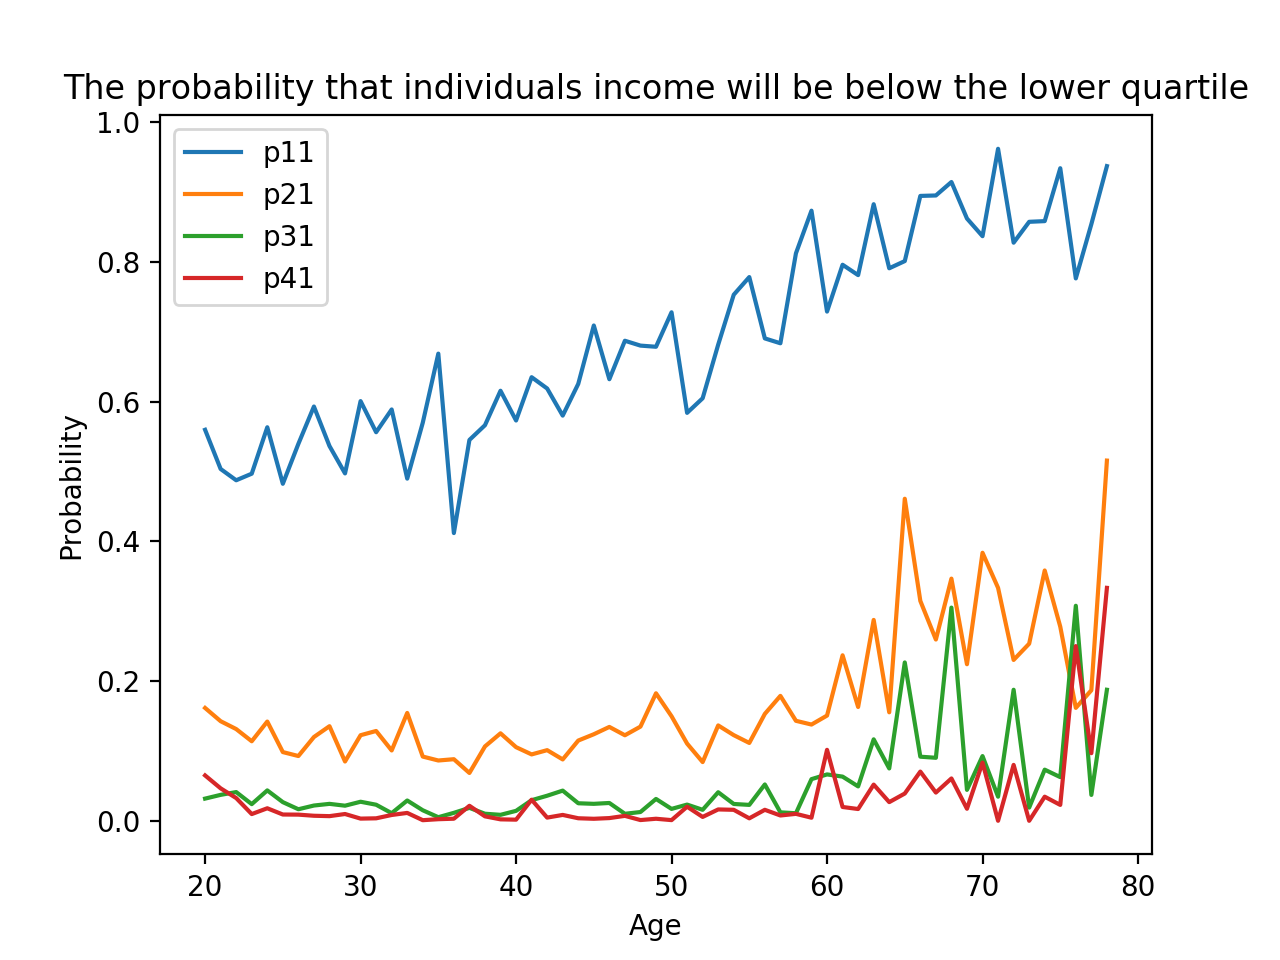

In [56]:
%matplotlib notebook
m11=[]
m21=[]
m31=[]
m41=[]
for i in markov3:
    m11.append(i[0][0])
    m21.append(i[1][0])
    m31.append(i[2][0])
    m41.append(i[3][0])
age=np.arange(20,20+len(q11))
plt.plot(age,m11,label='p11')
plt.plot(age,m21,label='p21')
plt.plot(age,m31,label='p31')
plt.plot(age,m41,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be below the lower quartile')
plt.legend()

<IPython.core.display.Javascript object>


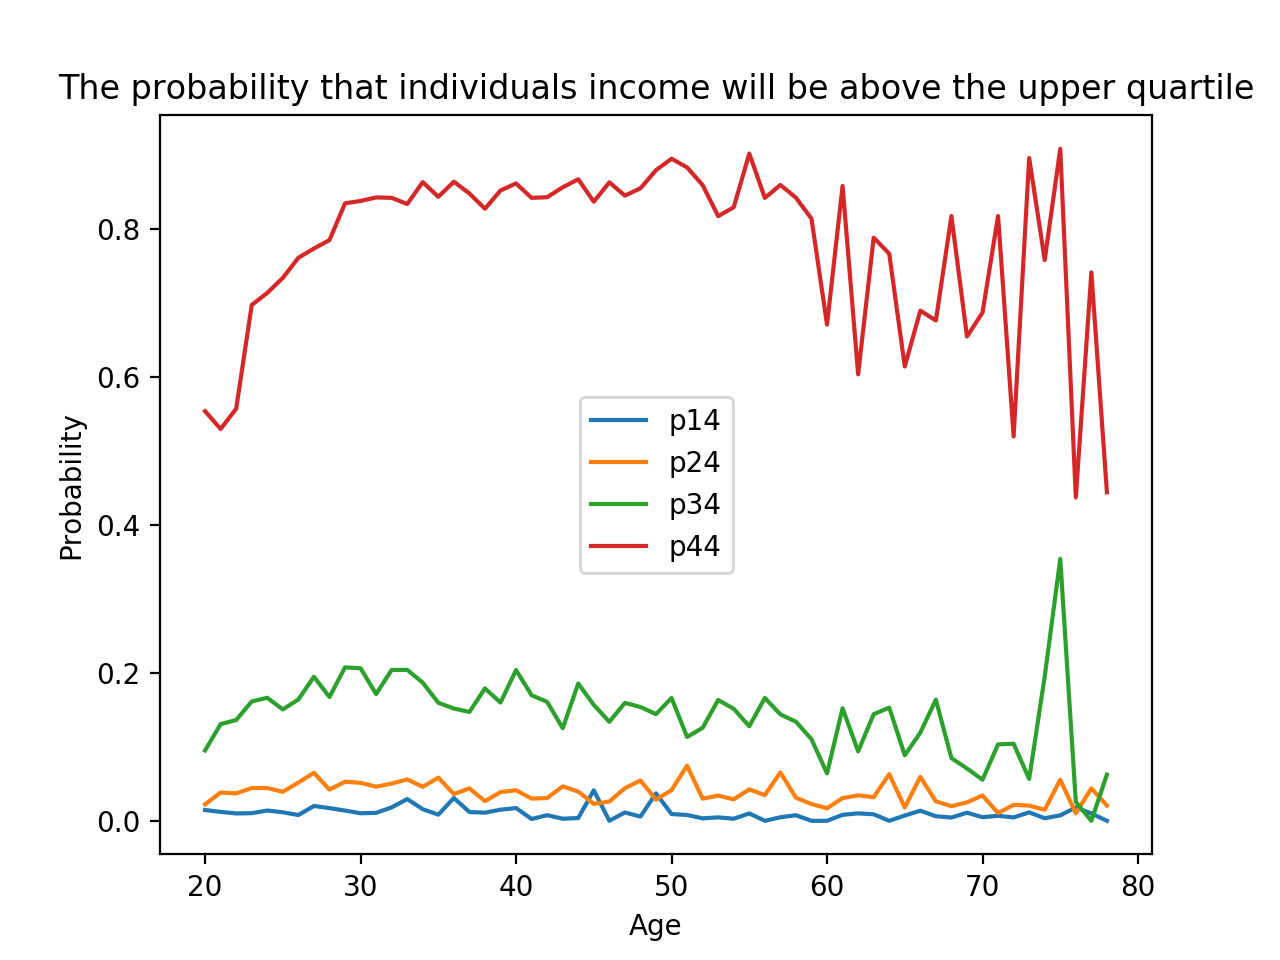

In [57]:
%matplotlib notebook
m14=[]
m24=[]
m34=[]
m44=[]
for i in markov3:
    m14.append(i[0][3])
    m24.append(i[1][3])
    m34.append(i[2][3])
    m44.append(i[3][3])
age=np.arange(20,20+len(q11))
plt.plot(age,m14,label='p14')
plt.plot(age,m24,label='p24')
plt.plot(age,m34,label='p34')
plt.plot(age,m44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be above the upper quartile')
plt.legend()

<IPython.core.display.Javascript object>


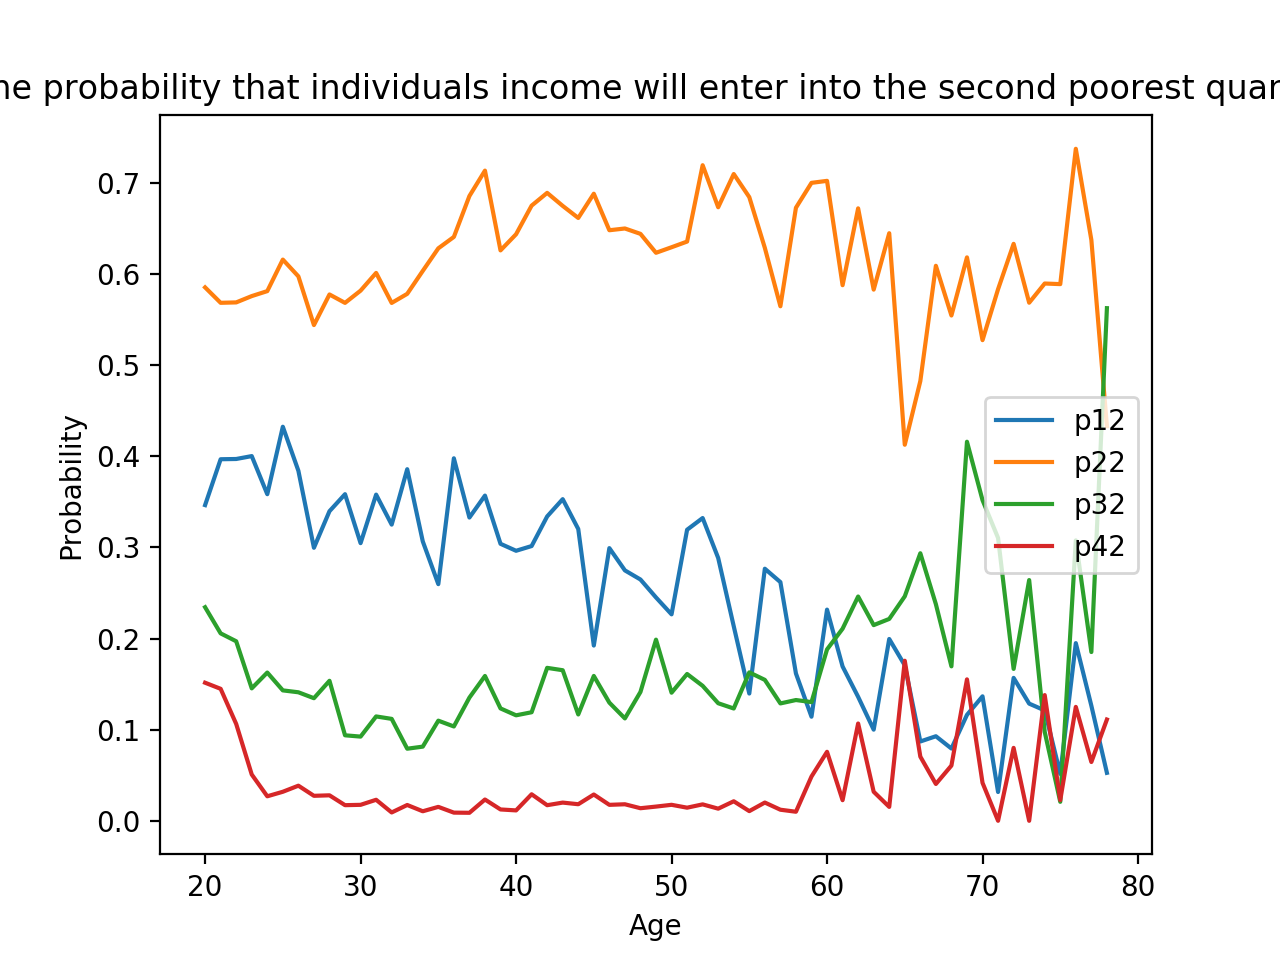

In [58]:
%matplotlib notebook
m12=[]
m22=[]
m32=[]
m42=[]
for i in markov3:
    m12.append(i[0][1])
    m22.append(i[1][1])
    m32.append(i[2][1])
    m42.append(i[3][1])
age=np.arange(20,20+len(q11))
plt.plot(age,m12,label='p12')
plt.plot(age,m22,label='p22')
plt.plot(age,m32,label='p32')
plt.plot(age,m42,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second poorest quantile')
plt.legend()

<IPython.core.display.Javascript object>


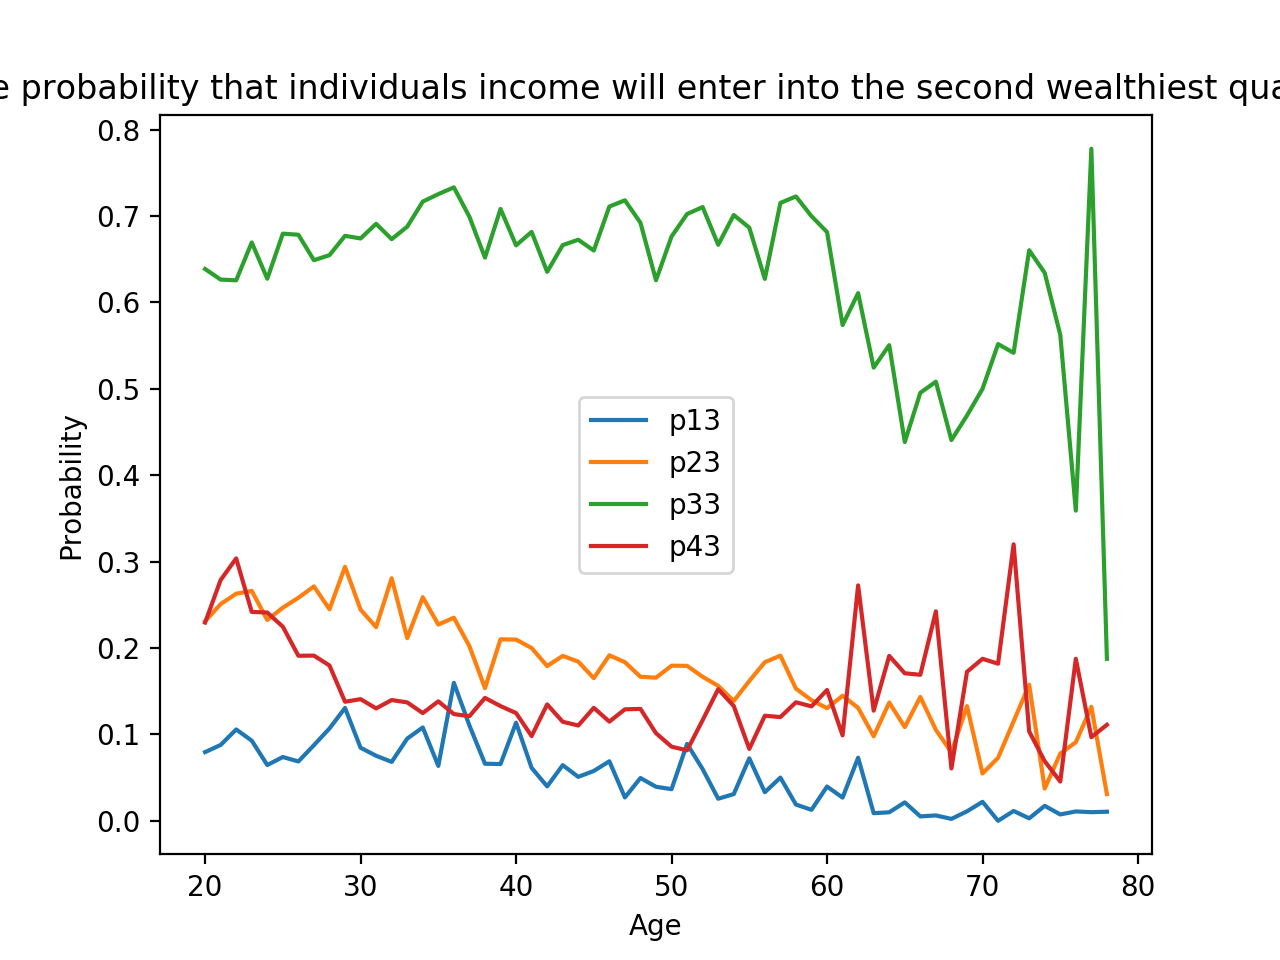

In [55]:
%matplotlib notebook
m13=[]
m23=[]
m33=[]
m43=[]
for i in markov3:
    m13.append(i[0][2])
    m23.append(i[1][2])
    m33.append(i[2][2])
    m43.append(i[3][2])
age=np.arange(20,20+len(q11))
plt.plot(age,m13,label='p13')
plt.plot(age,m23,label='p23')
plt.plot(age,m33,label='p33')
plt.plot(age,m43,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second wealthiest quantile')
plt.legend()

The income transition matrix using the data from 1979-1990:

In [61]:
med_mar4=[[0]*16]*59
med_mar4=np.array(med_mar4)
for i in range(len(income)):
    for j in range(11,len(age_ind)-2):
        type=16
        if j>10:
            age=income.values[i][4+5*j]
            inc=income.values[i][5+5*j]
            age2=income.values[i][4+5*(j+1)]
            inc2=income.values[i][5+5*(j+1)]
        #elif j>=23:
            #age=income.val ues[i][4+5*j]
            #inc=income.values[i][5+5*j]
            #age2=income.values[i][4+5*(j+1)]
            #inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=78) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=0
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=1
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=2
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=3
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=4
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=5
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=6
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=7
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2<inc_quan[j+1][2]):
                type=8
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=9
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=10
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][0]):
                type=11
            elif (inc>=inc_quan[j][0]) & (inc2<inc_quan[j+1][2]):
                type=12
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=13
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=14
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][0]):
                type=15
            med_mar4[int(age)-20][type]+=1

In [62]:
med_mar4=med_mar4.reshape(59,4,4)
print(med_mar4)
markov4=[]
for i in range(len(med_mar4)):
    for j in range(4):
        sum_quan=sum(med_mar4[i][j])
        med_mar4[i][j]/max(sum_quan,0.1)
        markov4.append(med_mar4[i][j]/max(sum_quan,0.1))
markov4=np.array(markov4)
markov4=markov4.reshape(59,4,4)

[[[ 468  337   93   16]
  [ 193  572  241   31]
  [  33  141  327   82]
  [   1    5   29   71]]

 [[ 394  297   78    9]
  [ 179  638  306   29]
  [  33  149  479  120]
  [   5    9   55  108]]

 [[ 300  223   99   18]
  [ 177  640  326   30]
  [  38  209  619  153]
  [   4   14   80  180]]

 [[ 289  255   80   16]
  [ 172  648  380   48]
  [  45  237  724  200]
  [  11   16  110  277]]

 [[ 266  219   58    7]
  [ 171  639  374   39]
  [  55  218  891  196]
  [   7   17  139  428]]

 [[ 262  202   45   12]
  [ 146  629  309   46]
  [  48  237  984  234]
  [  12   26  115  563]]

 [[ 246  162   49   14]
  [ 150  583  293   37]
  [  53  246  996  250]
  [   8   23  146  652]]

 [[ 242  143   43   11]
  [ 120  551  286   41]
  [  44  227  938  242]
  [   4   41  160  807]]

 [[ 227  149   42    6]
  [ 132  531  235   40]
  [  38  203  907  236]
  [  16   39  152  897]]

 [[ 234  140   40   10]
  [ 117  499  222   28]
  [  45  206  860  218]
  [  15   32  173  955]]

 [[ 229  131   27   

In [63]:
print(markov4)

[[[0.51203501 0.36870897 0.10175055 0.01750547]
  [0.18611379 0.55159113 0.23240116 0.02989392]
  [0.05660377 0.24185249 0.56089194 0.1406518 ]
  [0.00943396 0.04716981 0.27358491 0.66981132]]

 [[0.50642674 0.38174807 0.10025707 0.01156812]
  [0.15538194 0.55381944 0.265625   0.02517361]
  [0.04225352 0.19078105 0.61331626 0.15364917]
  [0.02824859 0.05084746 0.31073446 0.61016949]]

 [[0.46875    0.3484375  0.1546875  0.028125  ]
  [0.15089514 0.54560955 0.27791986 0.02557545]
  [0.03729146 0.20510304 0.60745829 0.1501472 ]
  [0.01438849 0.05035971 0.28776978 0.64748201]]

 [[0.4515625  0.3984375  0.125      0.025     ]
  [0.13782051 0.51923077 0.30448718 0.03846154]
  [0.03731343 0.19651741 0.60033167 0.16583748]
  [0.02657005 0.03864734 0.26570048 0.66908213]]

 [[0.48363636 0.39818182 0.10545455 0.01272727]
  [0.13982011 0.52248569 0.3058054  0.0318888 ]
  [0.04044118 0.16029412 0.65514706 0.14411765]
  [0.01184433 0.02876481 0.23519459 0.72419628]]

 [[0.50287908 0.38771593 0.086

<IPython.core.display.Javascript object>


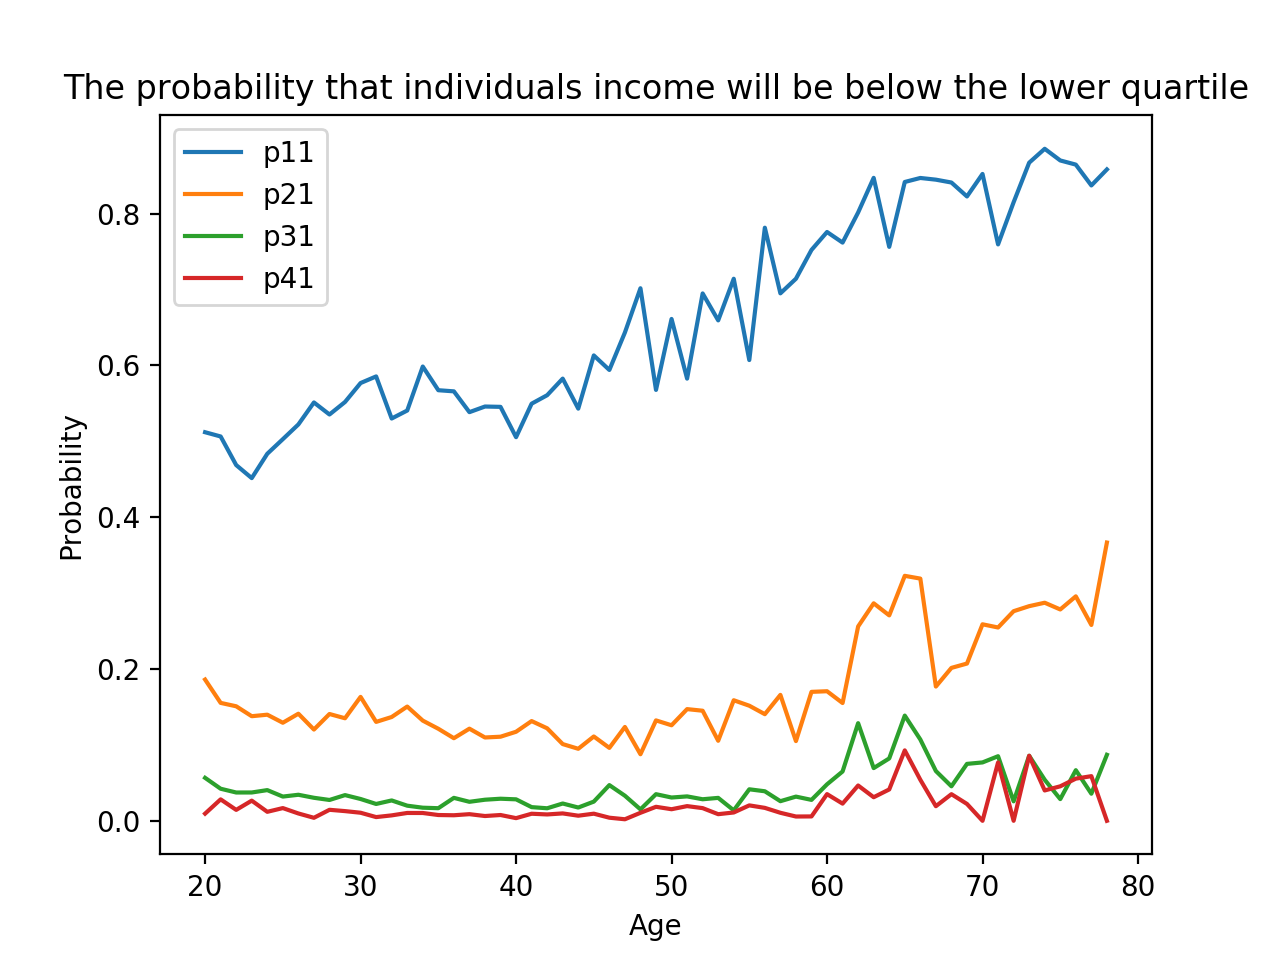

In [70]:
%matplotlib notebook
n11=[]
n21=[]
n31=[]
n41=[]
for i in markov4:
    n11.append(i[0][0])
    n21.append(i[1][0])
    n31.append(i[2][0])
    n41.append(i[3][0])
age=np.arange(20,20+len(q11))
plt.plot(age,n11,label='p11')
plt.plot(age,n21,label='p21')
plt.plot(age,n31,label='p31')
plt.plot(age,n41,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be below the lower quartile')
plt.legend()

<IPython.core.display.Javascript object>


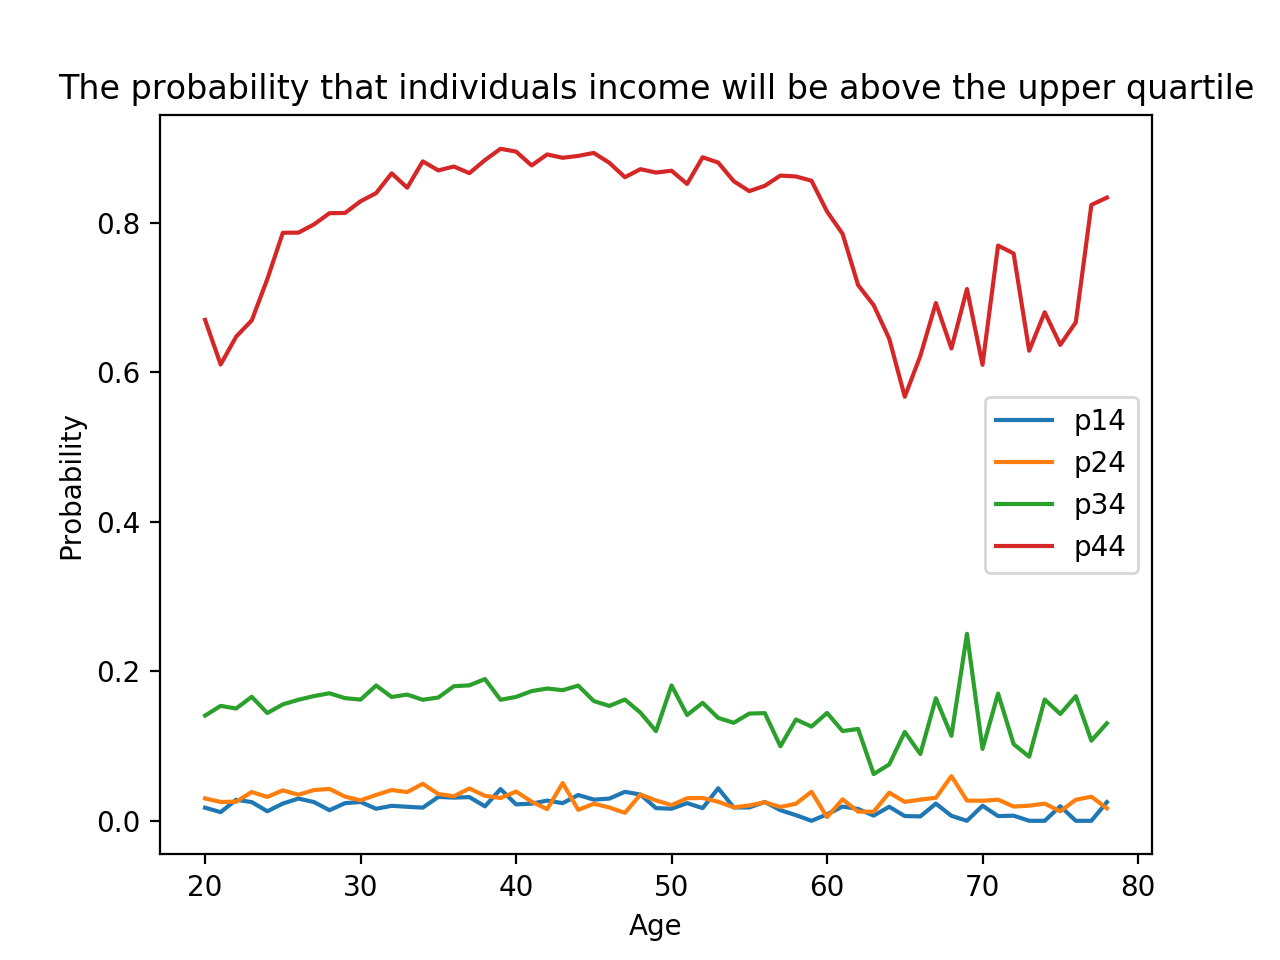

In [69]:
%matplotlib notebook
n14=[]
n24=[]
n34=[]
n44=[]
for i in markov4:
    n14.append(i[0][3])
    n24.append(i[1][3])
    n34.append(i[2][3])
    n44.append(i[3][3])
age=np.arange(20,20+len(q11))
plt.plot(age,n14,label='p14')
plt.plot(age,n24,label='p24')
plt.plot(age,n34,label='p34')
plt.plot(age,n44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be above the upper quartile')
plt.legend()

<IPython.core.display.Javascript object>


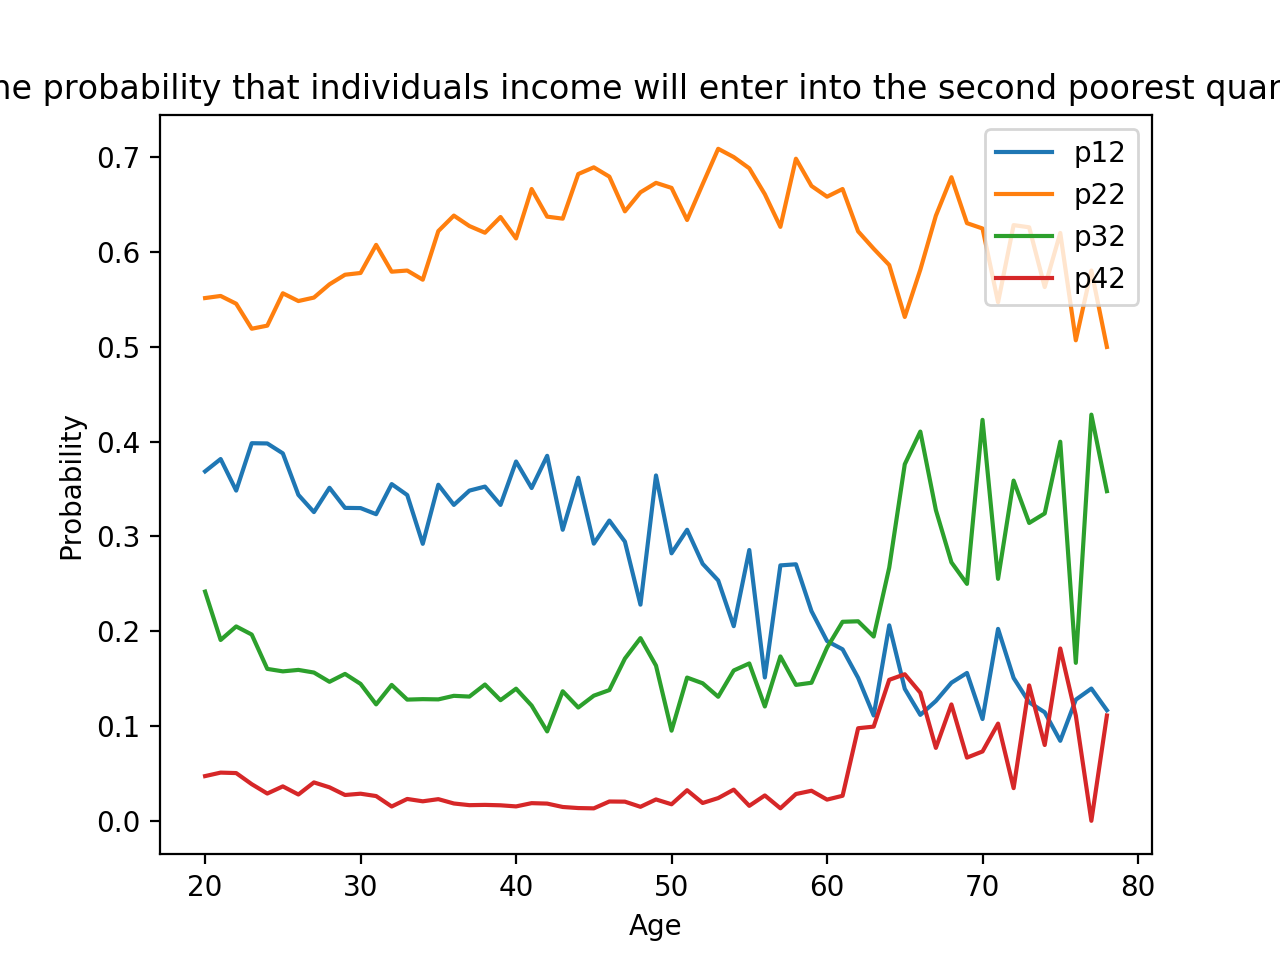

In [68]:
%matplotlib notebook
n12=[]
n22=[]
n32=[]
n42=[]
for i in markov4:
    n12.append(i[0][1])
    n22.append(i[1][1])
    n32.append(i[2][1])
    n42.append(i[3][1])
age=np.arange(20,20+len(q11))
plt.plot(age,n12,label='p12')
plt.plot(age,n22,label='p22')
plt.plot(age,n32,label='p32')
plt.plot(age,n42,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second poorest quantile')
plt.legend()

<IPython.core.display.Javascript object>


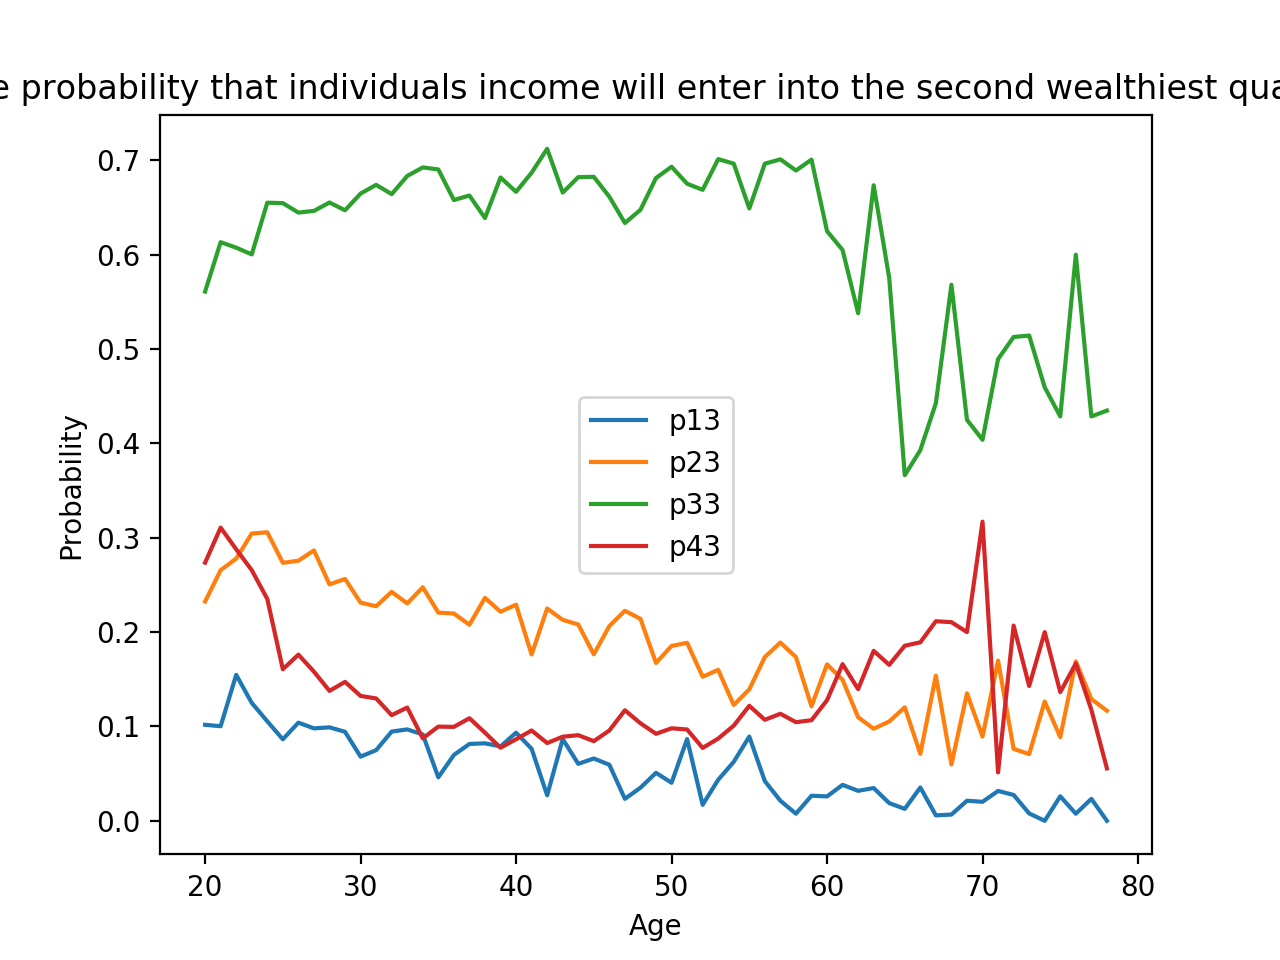

In [67]:
%matplotlib notebook
n13=[]
n23=[]
n33=[]
n43=[]
for i in markov4:
    n13.append(i[0][2])
    n23.append(i[1][2])
    n33.append(i[2][2])
    n43.append(i[3][2])
age=np.arange(20,20+len(q11))
plt.plot(age,n13,label='p13')
plt.plot(age,n23,label='p23')
plt.plot(age,n33,label='p33')
plt.plot(age,n43,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second wealthiest quantile')
plt.legend()

### Putting two figures together

<IPython.core.display.Javascript object>


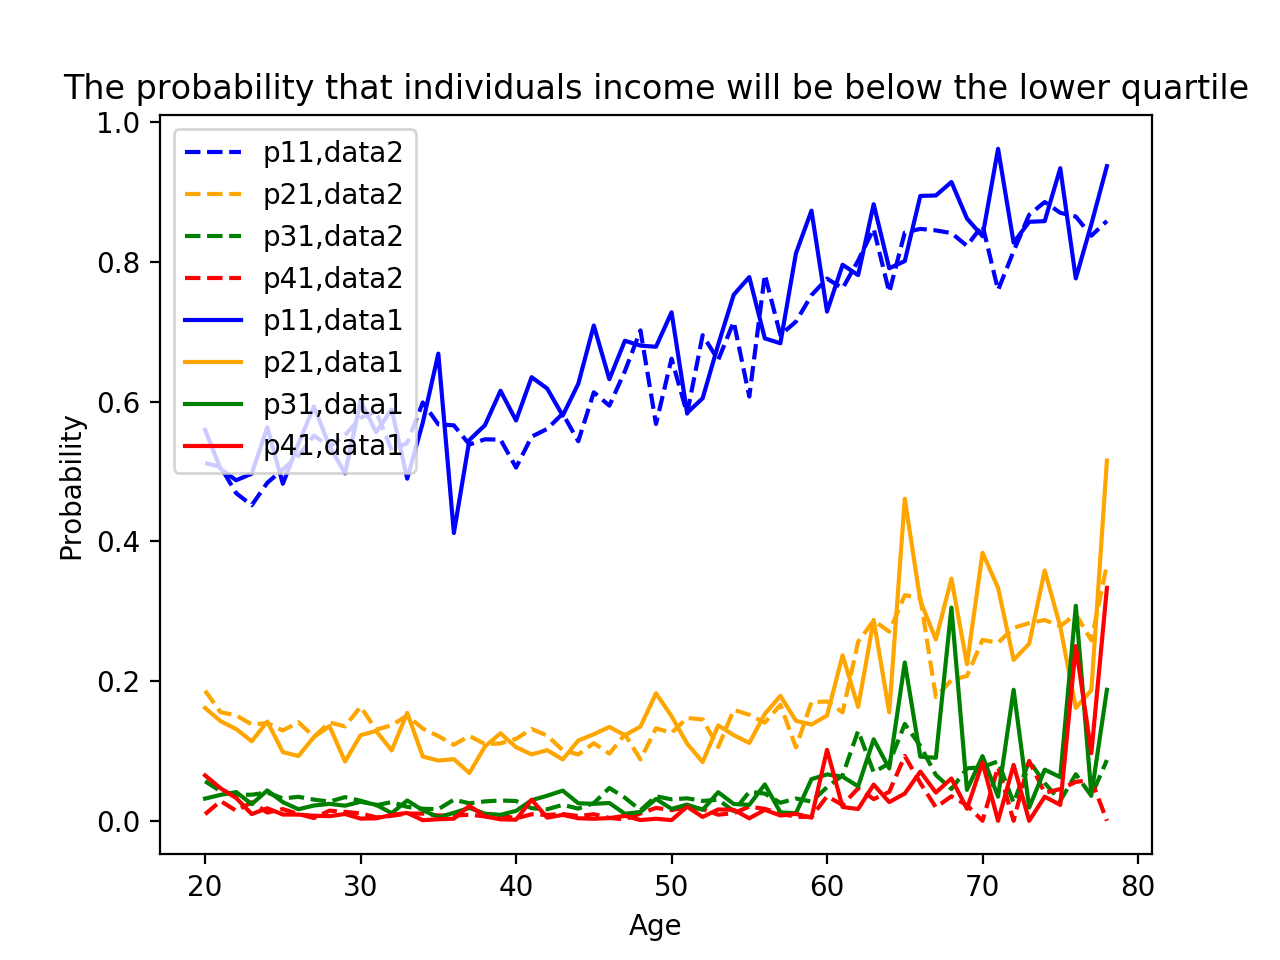

In [71]:
%matplotlib notebook
plt.plot(age,n11,label='p11,data2',color='blue',linestyle='dashed')
plt.plot(age,n21,label='p21,data2',color='orange',linestyle='dashed')
plt.plot(age,n31,label='p31,data2',color='green',linestyle='dashed')
plt.plot(age,n41,label='p41,data2',color='red',linestyle='dashed')
plt.plot(age,m11,label='p11,data1',color='blue')
plt.plot(age,m21,label='p21,data1',color='orange')
plt.plot(age,m31,label='p31,data1',color='green')
plt.plot(age,m41,label='p41,data1',color='red')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be below the lower quartile')
plt.legend()

<IPython.core.display.Javascript object>


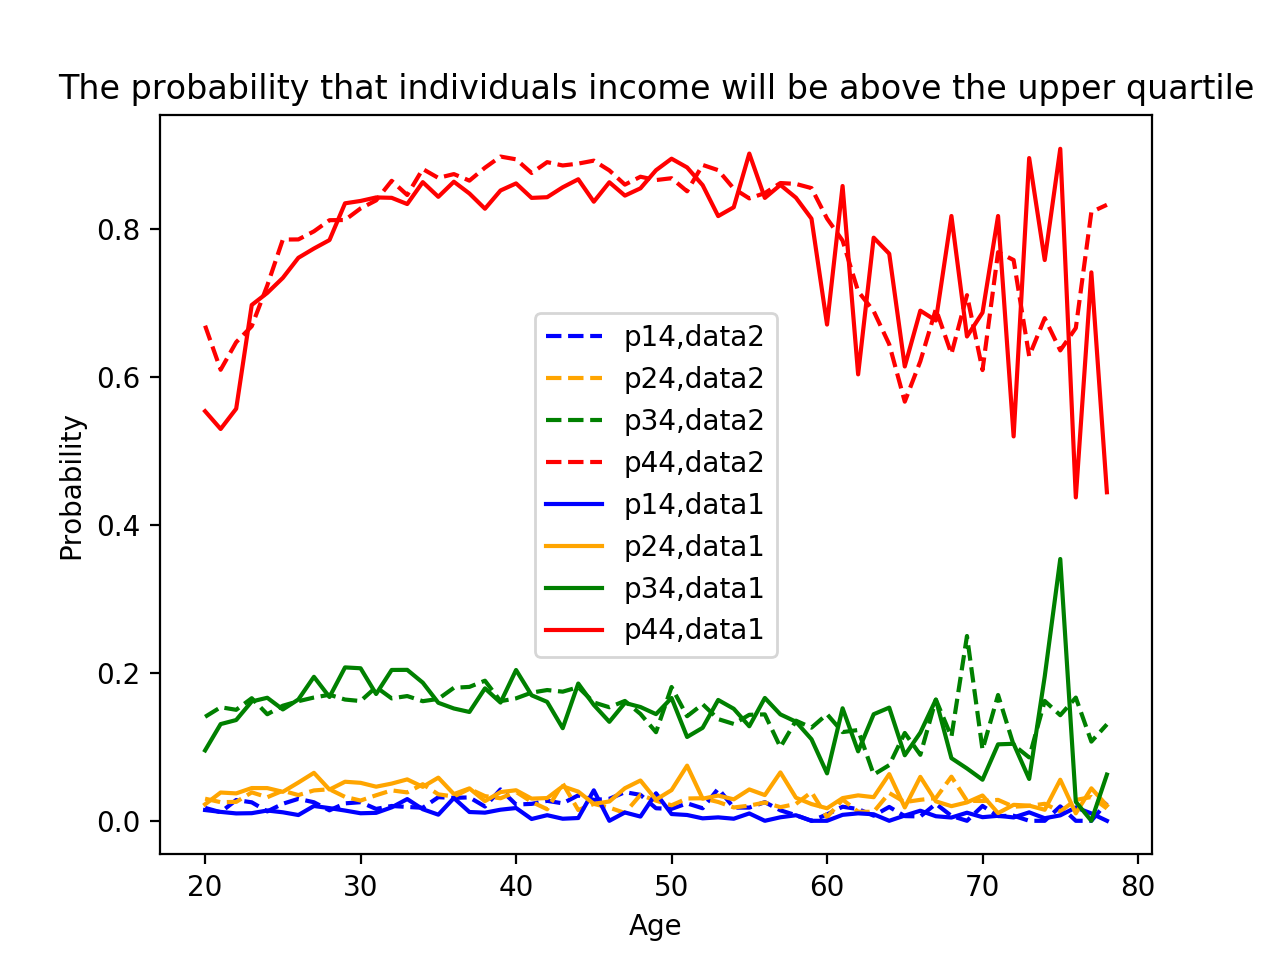

In [72]:
%matplotlib notebook
plt.plot(age,n14,label='p14,data2',color='blue',linestyle='dashed')
plt.plot(age,n24,label='p24,data2',color='orange',linestyle='dashed')
plt.plot(age,n34,label='p34,data2',color='green',linestyle='dashed')
plt.plot(age,n44,label='p44,data2',color='red',linestyle='dashed')
plt.plot(age,m14,label='p14,data1',color='blue')
plt.plot(age,m24,label='p24,data1',color='orange')
plt.plot(age,m34,label='p34,data1',color='green')
plt.plot(age,m44,label='p44,data1',color='red')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will be above the upper quartile')
plt.legend()

<IPython.core.display.Javascript object>


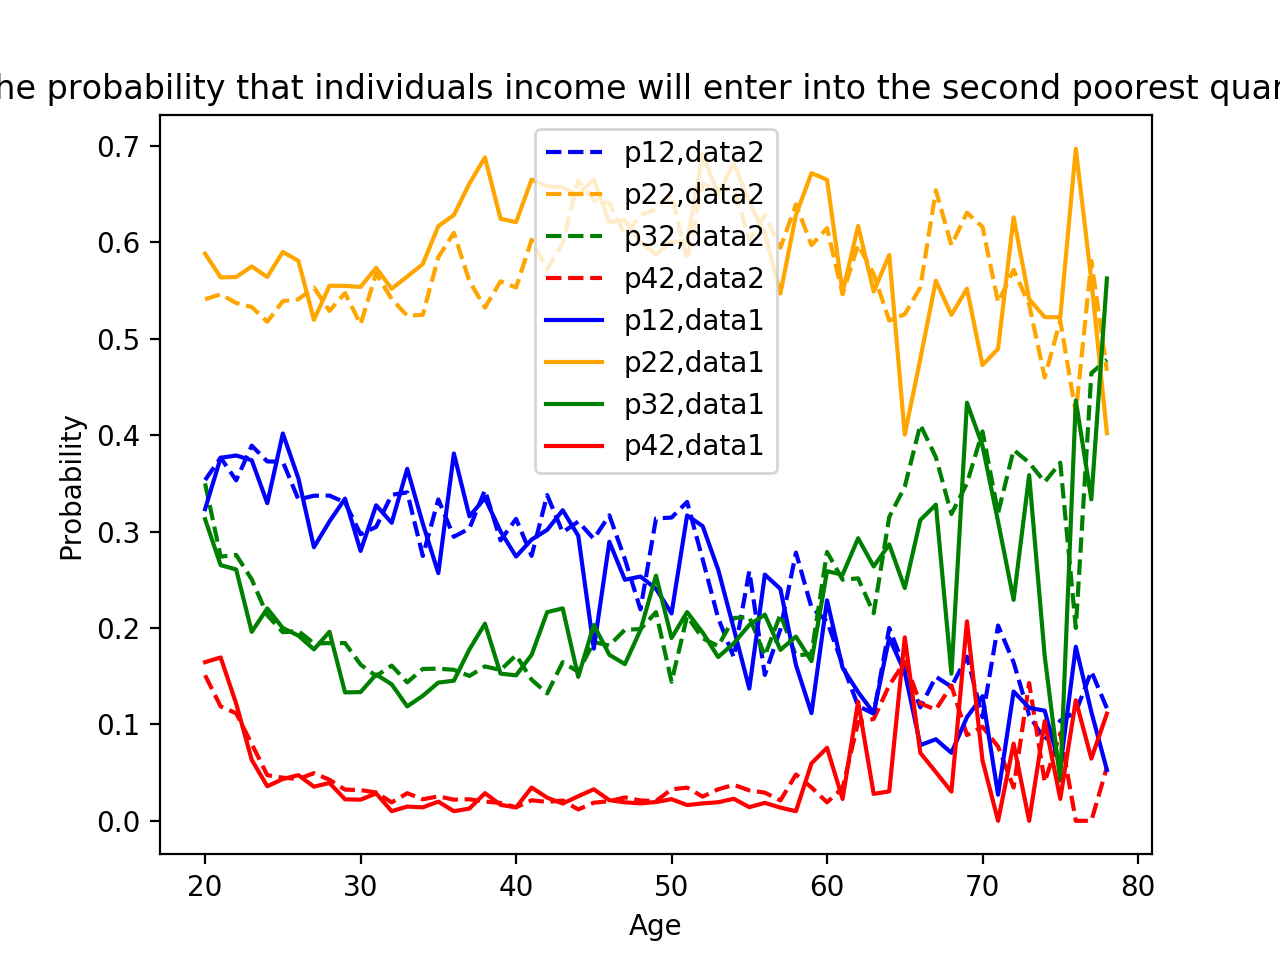

In [50]:
%matplotlib notebook
plt.plot(age,n12,label='p12,data2',color='blue',linestyle='dashed')
plt.plot(age,n22,label='p22,data2',color='orange',linestyle='dashed')
plt.plot(age,n32,label='p32,data2',color='green',linestyle='dashed')
plt.plot(age,n42,label='p42,data2',color='red',linestyle='dashed')
plt.plot(age,m12,label='p12,data1',color='blue')
plt.plot(age,m22,label='p22,data1',color='orange')
plt.plot(age,m32,label='p32,data1',color='green')
plt.plot(age,m42,label='p42,data1',color='red')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second poorest quartile')
plt.legend()

<IPython.core.display.Javascript object>


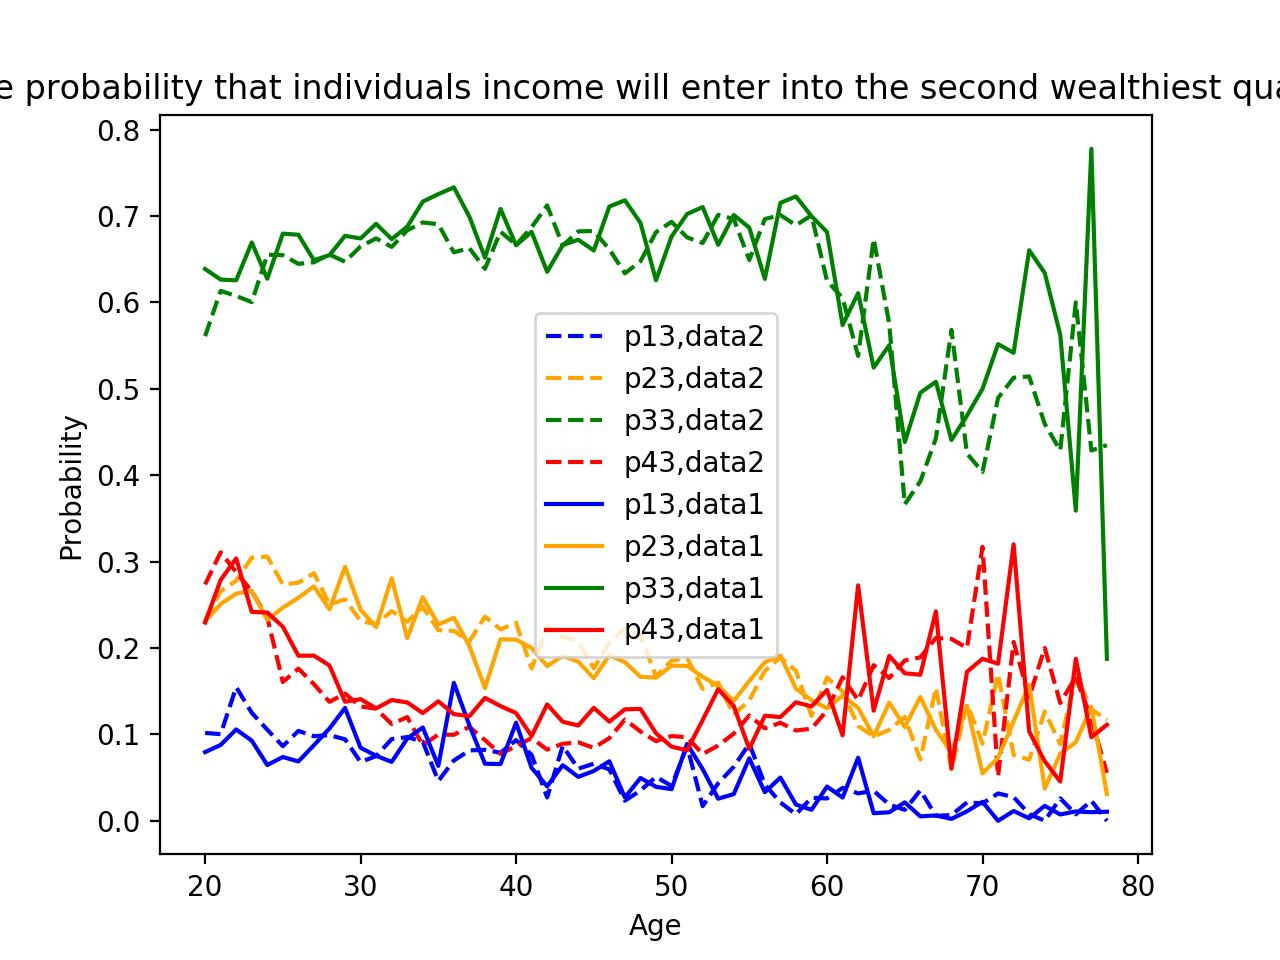

In [73]:
%matplotlib notebook
plt.plot(age,n13,label='p13,data2',color='blue',linestyle='dashed')
plt.plot(age,n23,label='p23,data2',color='orange',linestyle='dashed')
plt.plot(age,n33,label='p33,data2',color='green',linestyle='dashed')
plt.plot(age,n43,label='p43,data2',color='red',linestyle='dashed')
plt.plot(age,m13,label='p13,data1',color='blue')
plt.plot(age,m23,label='p23,data1',color='orange')
plt.plot(age,m33,label='p33,data1',color='green')
plt.plot(age,m43,label='p43,data1',color='red')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('The probability that individuals income will enter into the second wealthiest quartile')
plt.legend()

## 2. Linking Location Variable